# Covid 19 Analysis and Prediction

## Table of Contents

* 1. Introduction

* 2. Dataset Content

* 3. Initial Questions to be Answered

* 4. Importing our Libraries and Modules

* 5. Data Preparation and Pre-processing
     * 5.1 Data Overview
     * 5.2 Handling Missing Values
    
* 6. Exploratory Data Analysis
     * 6.1 How many people have died?
     * 6.2 And, did they all have the same results?
     * 6.3 What is the percentage of Covid carriers among those dead patients?
     * 6.4 What about the percentage of Covid carriers among all the patients?
     * 6.5 What is the percentage of death among those carriers?
     * 6.6 Is it true that age has some impact?
     * 6.7 Does obesity has an impact?
     * 6.8 Does gender has any impact?
     * 6.9 Does pregnancy has any impact?
     * 6.10 Do other diseases affect the patient classification?
     * 6.11 How many patients were hospitalized?
     * 6.12 How many of them (hospitalized people) have died?
     * 6.13 How many of the dead patients were hospitalized?
     * 6.14 How many of those hospitalized patients had been admitted to the ICU?
     * 6.15 How many of those hospitalized patients had been admitted to the ICU?
     * 6.16 How many of those ICU patients have died?
     * 6.17 What is the death trend with respect to time?
   
* 7. Modeling and Results
     * 7.1 Feature Selection
         * 7.1.1 Data Splitting
         * 7.1.2 Checking for Correlated Features
     * 7.2 Checking Data for Balance    
     * 7.3 Training and Testing
         * 7.3.1 Logistic Regression
         * 7.3.2 Decision Tree
         * 7.3.3 Random Forest
         * 7.3.4 Naive Bayes
                  
* 8. Conclusion

# Introduction

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is at high risk or not.

# Dataset Content
The dataset is obtained from Kaggle at the following link:
https://www.kaggle.com/datasets/meirnizri/covid19-dataset, and was provided by the Mexican government, which can be found at this link:
https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico



This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, **1 means "yes" and 2 means "no". values as 97 and 99 are missing data**.
<br>
<br>
The features can be explained as follows:
<br>
* **sex**: 1 for female and 2 for male.
<br>
* **age**: of the patient.
<br>
* **classification**: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
<br>
* **patient type**: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
<br>
* **pneumonia**: whether the patient already have air sacs inflammation or not.
<br>
* **pregnancy**: whether the patient is pregnant or not.
<br>
* **diabetes**: whether the patient has diabetes or not.
<br>
* **copd**: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
<br>
* **asthma**: whether the patient has asthma or not.
<br>
* **inmsupr**: whether the patient is immunosuppressed or not.
<br>
* **hypertension**: whether the patient has hypertension or not.
<br>
* **cardiovascular**: whether the patient has heart or blood vessels related disease.
<br>
* **renal chronic**: whether the patient has chronic renal disease or not.
<br>
* **other disease**: whether the patient has other disease or not.
<br>
* **obesity**: whether the patient is obese or not.
<br>
* **tobacco**: whether the patient is a tobacco user.
<br>
* **usmr** Indicates whether the patient treated medical units of the first, second or third level.
<br>
* **medical unit**: type of institution of the National Health System that provided the care.
<br>
* **intubed**: whether the patient was connected to the ventilator.
<br>
* **icu**: Indicates whether the patient had been admitted to an Intensive Care Unit.
<br>
* **date died**: If the patient died indicate the date of death, and 9999-99-99 otherwise.

-------------

# Initial Questions to be Answered:

### 1-  How many people have died?
### 2-  And, did they all have the same results?
### 3-  Is it true that age has some impact?
### 4-  Does Obesity have any impact
### 5-  Does gender have any impact?
### 6-  How do other diseases affect the patient classification?
### 7-  How many patients were diagnosed with Covid 19 of 1st, 2nd, or 3rd degrees?
### 8-  How many of them have died?
### 9-  How many patients were hospitalized?
### 10-  How many of them have died?
### 11-  How many patients had been admitted to an Intensive Care Unit?
### 12-  How many of them have died?
<br>
<br>

### More questions to come as we progress through our analysis :D

------------------------

# Importing our Libraries and Modules:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter # To adjust the ticks formatting
import warnings
warnings.filterwarnings('ignore') # To ignore warning messages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

--------------------------------------------

# Data Preparation and Preprocessing

In [3]:
# Loading our dataset
df = pd.read_csv("Covid Data.csv")

In [4]:
# Viewing our dataset
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [5]:
# Check duplication percentage:
(df.duplicated().sum()/df.shape[0])*100

77.44310135183463

In [6]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [7]:
# Check for missing values
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

### But this is not our actual status regarding missing values, let's reveal our true status:

In [8]:
df_null = df.copy()
for i in [97, 98, 99]:
   df_null.replace(i , np.nan, inplace = True)

In [9]:
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

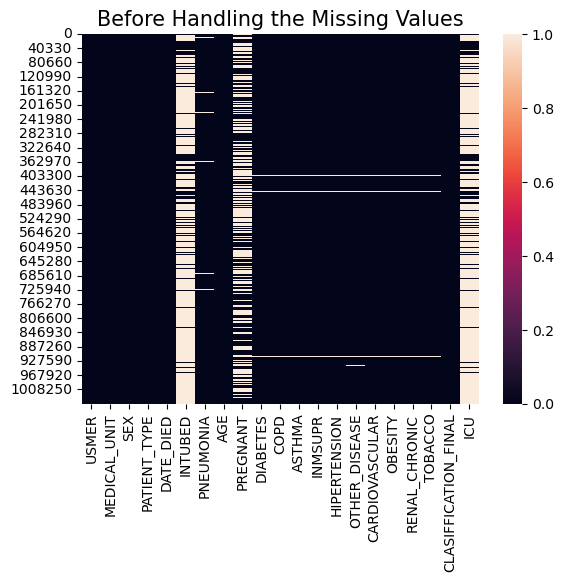

In [10]:
sns.heatmap(df_null.isnull())
plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [11]:
# Check for any strings in the feature "DATE_DIED"
df['DATE_DIED'][df['DATE_DIED'].apply(lambda x: isinstance(x, str))]

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

The `isinstance()` function returns `True` if the specified object is of the specified type, otherwise `False`.
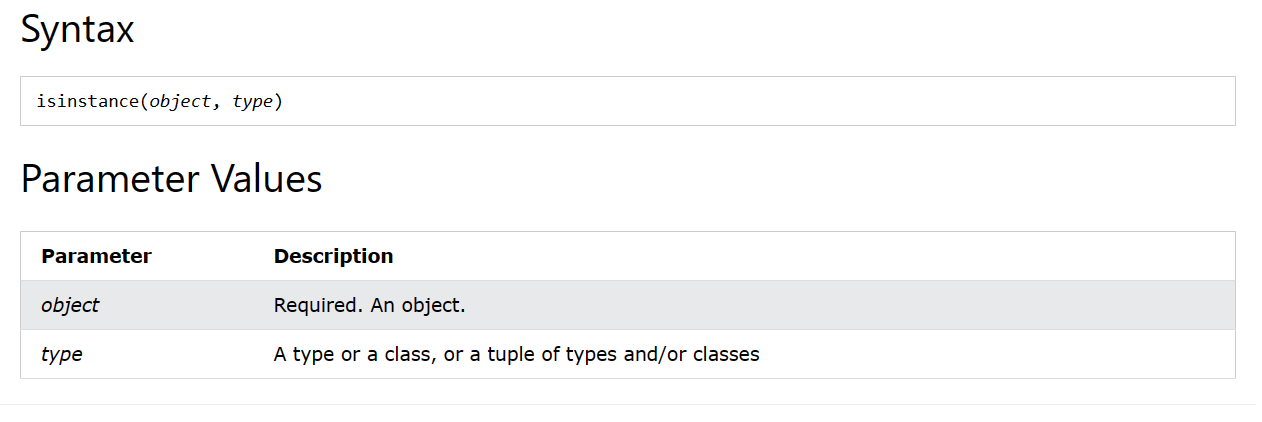
<br>
for example:<br>
Check if the number 5 is an integer:
`x = isinstance(5, int)`
<br>
output -----> `True`
<br>
<br>
If the type parameter is a tuple, this function will return True if the object is one of the types in the tuple.<br>
for example:<br>
`x = isinstance("Hello", (str, float, int, str, list, dict, tuple))` <br>
`print(x)`
<br>
output -----> `True`


#### As predicted Python treats the written dates as strings, so we can leave things as they are for now.

In [12]:
df['DEAD'] = [0 if i=='9999-99-99' else 1 for i in df.DATE_DIED]

In [13]:
df['DEAD'].value_counts()

0    971633
1     76942
Name: DEAD, dtype: int64

In [14]:
df['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [15]:
df['DATE_DIED']

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570           NaN
1048571           NaN
1048572           NaN
1048573           NaN
1048574           NaN
Name: DATE_DIED, Length: 1048575, dtype: object

In [16]:
df['DATE_DIED'] =  pd.to_datetime(df['DATE_DIED'])

In [17]:
df['DATE_DIED']

0         2020-03-05
1         2020-03-06
2         2020-09-06
3         2020-12-06
4         2020-06-21
             ...    
1048570          NaT
1048571          NaT
1048572          NaT
1048573          NaT
1048574          NaT
Name: DATE_DIED, Length: 1048575, dtype: datetime64[ns]

In [18]:
df['DATE_DIED'].isnull().sum()

971633

### Let's have a general overview of our dataset:

In [19]:
df.describe().round(3).T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,79.523,36.869,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,3.347,11.913,1.0,2.0,2.0,2.0,99.0
AGE,41.794,16.907,0.0,30.0,40.0,53.0,121.0
PREGNANT,49.766,47.511,1.0,2.0,97.0,97.0,98.0
DIABETES,2.186,5.424,1.0,2.0,2.0,2.0,98.0
COPD,2.261,5.132,1.0,2.0,2.0,2.0,98.0


### First, let's deal with our missing data (values of 97, 98 and 99):

### We can notice that we have major missing values at the following features:
#### 1- "ICU"
#### 2- "INTUBED"
#### 3- "PREGNANT"

#### We ignored those of the "DATE_DIED" feature; as those values aren't actually missing ;D

In [20]:
df['AGE'][df['AGE'] > 110].value_counts().sum()

22

### Obviously these values are 90% most likely to be missing data, but we are going to ignore that (as they are very very few) and assume that these people are "Centenarians" with ages greater than 110.

In [21]:
df.SEX.value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [22]:
df.SEX.shape

(1048575,)

In [23]:
df[(df['SEX'] == 1)].shape

(525064, 22)

In [24]:
df[(df['SEX'] == 2)].shape

(523511, 22)

In [25]:
df[(df['SEX'] == 1)]['PREGNANT'] # Females corresponding values in 'PREGNANT' feature

0          2
3          2
5          2
6          2
7          2
          ..
1048563    2
1048564    2
1048565    2
1048567    2
1048569    2
Name: PREGNANT, Length: 525064, dtype: int64

In [26]:
df[(df['SEX'] == 1)]['PREGNANT'].value_counts()

2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [27]:
513179+8131+3754

525064

### Which equals to the no. of all females.

In [28]:
df[(df['SEX'] == 2)]['PREGNANT'] # Males corresponding values in 'PREGNANT' feature

1          97
2          97
4          97
11         97
12         97
           ..
1048570    97
1048571    97
1048572    97
1048573    97
1048574    97
Name: PREGNANT, Length: 523511, dtype: int64

In [29]:
df[(df['SEX'] == 2) & (df['PREGNANT'])]['PREGNANT'].value_counts()

97    523511
Name: PREGNANT, dtype: int64

In [30]:
df['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

### As suspected, we noticed that all values of 98 are of the missing values corresponding to the **female** values, while all those of 97 are of the ones corresponding to the **male** values.

### So obviously we can replace all the corresponding values to the male section (97) with (2); since obviously men can't be pregnant ;D.

In [31]:
df['PREGNANT'].replace (97, 2, inplace = True)

In [32]:
df['PREGNANT'].value_counts()

2     1036690
1        8131
98       3754
Name: PREGNANT, dtype: int64

### Unfortunatley we can't fill or replace the missing values of (98); because we can't tell which of these women were pregnant and which were not, and we can't also predict these values or fill them by random as it will affect our analysis which we are trying to build here based on only true and real life data, but luckily for us those values are very few with a very low impact so we can simply ignore them for now.

In [33]:
df.ICU.value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [34]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at ICU = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['ICU'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at ICU = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 1 the shape will be: 

(16858, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 2 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 2 the shape will be: 

(175685, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 97 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 99 the shape will be: 

(0, 22) 
 -----------------

### From the above we can see that the missing values of (97) are all corresponding to the values of PATIENT_TYPE = 1 which is for non hospitalized patients, while those of (99) are the missing values of the hospitalized patients, which again can not be telled or predicted.

<br>

### So we can replace all the values of (97) with (2); since obviously patients who have never been hospitalized couldn't possibly be admitted to the ICU.

In [35]:
df['ICU'].replace (97, 2, inplace = True)

In [36]:
df.ICU.value_counts()

2     1024229
1       16858
99       7488
Name: ICU, dtype: int64

In [37]:
df.INTUBED.value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [38]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at INTUBED = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['INTUBED'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at INTUBED = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 1 the shape will be: 

(33656, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 2 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 2 the shape will be: 

(159050, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 97 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 99 the shape will be: 


### Again and as predicted it's the same as the ICU case.


### So we can replace all the values of (97) with (2); since obviously patients who have never been hospitalized couldn't possibly be connected to the ventilator.

In [39]:
df['INTUBED'].replace (97, 2, inplace = True)

In [40]:
df.INTUBED.value_counts()

2     1007594
1       33656
99       7325
Name: INTUBED, dtype: int64

### So, all the rest of these missing values (values of 98 & 99) can't be predicted (at least for now) as they will affect our analysis, which is based on true and actual real life values.

### In other words, we can't fill them by random using any filling  (imputation) technique.

In [41]:
for i in [98, 99]:
   df.replace(i , np.nan, inplace = True)

In [42]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-03-05,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-03-06,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-12-06,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,2.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048571,1,13,2,2,NaT,2.0,2.0,51.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048572,2,13,2,1,NaT,2.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048573,2,13,2,1,NaT,2.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0


### Let's check now our progress regarding handling those outliers:

In [43]:
# First, let's temporarily reverse the step we did on "DATE_DIED" feature; as they are not really missing:
df_null2 = df.copy()
df_null2.DATE_DIED = df_null2.DATE_DIED.fillna("9999-99-99")

In [44]:
#Let's check again for our missing values:
df_null2.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
INTUBED                  7325
PNEUMONIA               16003
AGE                       210
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
ICU                      7488
DEAD                        0
dtype: int64

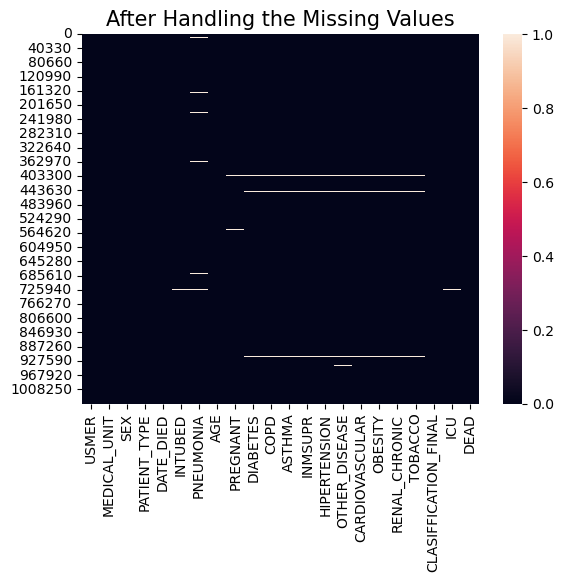

In [45]:
sns.heatmap(df_null2.isnull())
plt.title('After Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

### Ok, now we can freely drop the rest, but for analysis purposes we will delay this step to the time at which we are done with our analysis.

### Now let's check our data again:

In [46]:
df.describe().round(3).T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,1.968,0.177,1.0,2.0,2.0,2.0,2.0
PNEUMONIA,1.864,0.342,1.0,2.0,2.0,2.0,2.0
AGE,41.783,16.890,0.0,30.0,40.0,53.0,121.0
PREGNANT,1.992,0.088,1.0,2.0,2.0,2.0,2.0
DIABETES,1.880,0.324,1.0,2.0,2.0,2.0,2.0
COPD,1.986,0.119,1.0,2.0,2.0,2.0,2.0


#### As we can see most of the patients tend to not having any of the diseases, with very minimal of deaths.

In [47]:
# Let's have a look on our data's different classes:
for i in df.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i," -> ", dict(df[i].value_counts()))

USMER  ->  {2: 662903, 1: 385672}
MEDICAL_UNIT  ->  {12: 602995, 4: 314405, 6: 40584, 9: 38116, 3: 19175, 8: 10399, 10: 7873, 5: 7244, 11: 5577, 13: 996, 7: 891, 2: 169, 1: 151}
SEX  ->  {1: 525064, 2: 523511}
PATIENT_TYPE  ->  {1: 848544, 2: 200031}
INTUBED  ->  {2.0: 1007594, 1.0: 33656}
PNEUMONIA  ->  {2.0: 892534, 1.0: 140038}
PREGNANT  ->  {2.0: 1036690, 1.0: 8131}
DIABETES  ->  {2.0: 920248, 1.0: 124989}
COPD  ->  {2.0: 1030510, 1.0: 15062}
ASTHMA  ->  {2.0: 1014024, 1.0: 31572}
INMSUPR  ->  {2.0: 1031001, 1.0: 14170}
HIPERTENSION  ->  {2.0: 882742, 1.0: 162729}
OTHER_DISEASE  ->  {2.0: 1015490, 1.0: 28040}
CARDIOVASCULAR  ->  {2.0: 1024730, 1.0: 20769}
OBESITY  ->  {2.0: 885727, 1.0: 159816}
RENAL_CHRONIC  ->  {2.0: 1026665, 1.0: 18904}
TOBACCO  ->  {2.0: 960979, 1.0: 84376}
CLASIFFICATION_FINAL  ->  {7: 499250, 3: 381527, 6: 128133, 5: 26091, 1: 8601, 4: 3122, 2: 1851}
ICU  ->  {2.0: 1024229, 1.0: 16858}
DEAD  ->  {0: 971633, 1: 76942}


--------------------------------------------------------------

# Exploratory Data Analysis

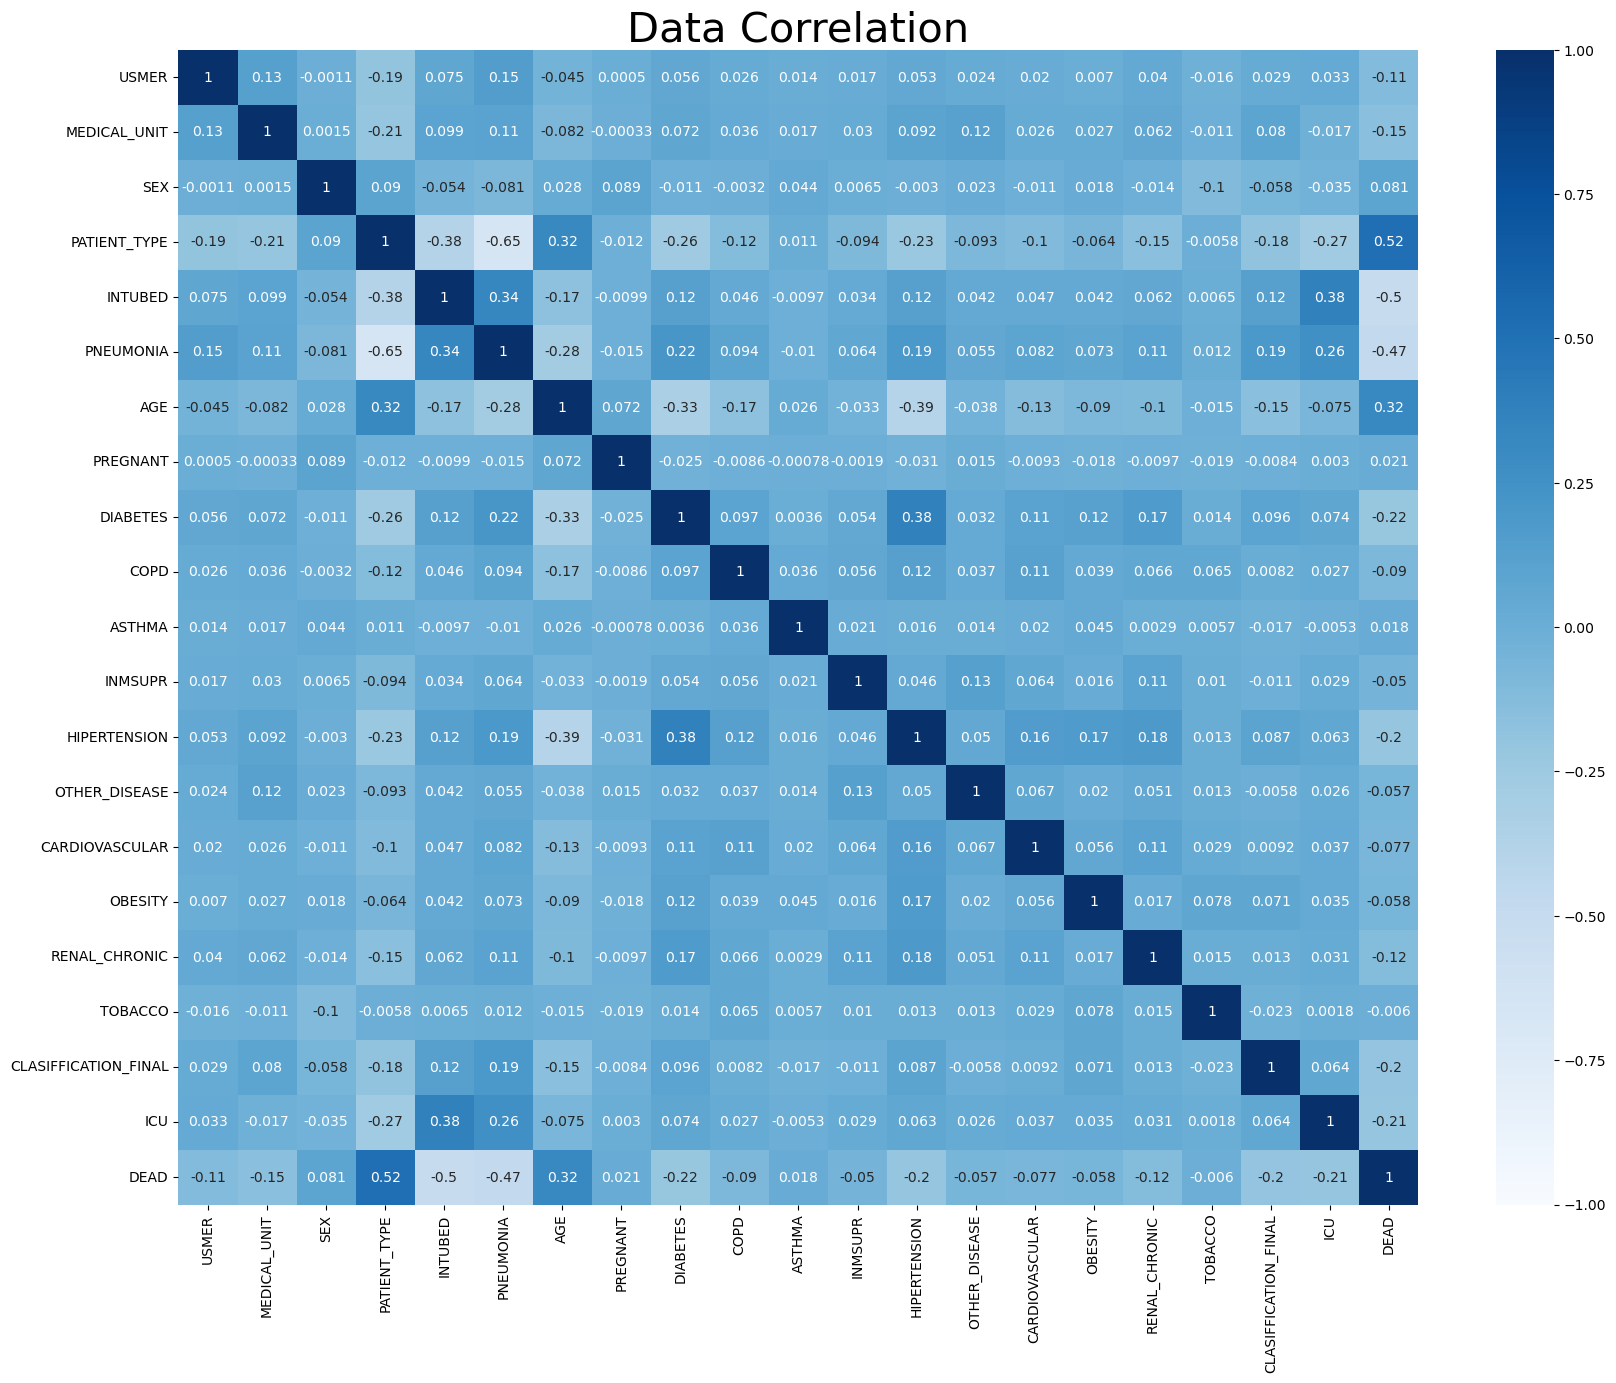

In [48]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.drop(columns=['DATE_DIED']).corr(), annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()

#### As colors go darker that indicates positive correlation, and as they go lighter that indicates negative correlation.

#### Also as the darkness or the lightness increases that indicates the increasing of the strength of the corresponding correlation.

In [49]:
# Let's first create a new DataFrame for medical conditions only:
df_med = df.drop(columns=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
                          'INTUBED', 'AGE', 'CLASIFFICATION_FINAL', 'ICU'], axis=1)
df_med

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEAD
0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048571,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0
1048572,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048573,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [50]:
df_med.duplicated(keep = False).sum()

1046563

### We can see that there are 1,046,683 patients with similar conditions split into some groups of patients with the same conditions

## 1- How many people have died?

In [51]:
dict(df['DEAD'].value_counts())[1]

76942

Text(0, 0.5, 'Count')

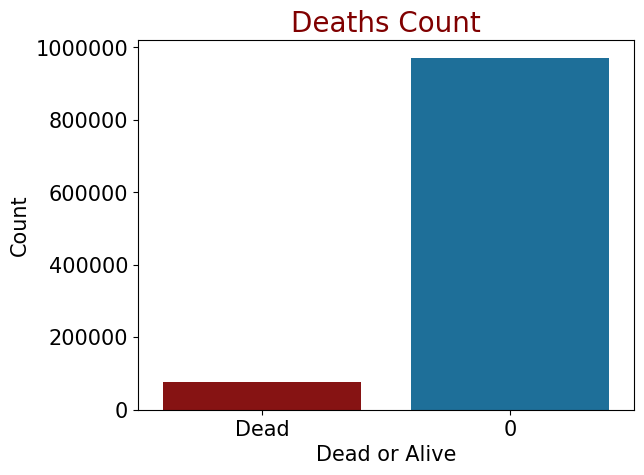

In [52]:
D = df['DEAD']
D = D.replace(1, "Dead")
D = D.replace(2, "Alive")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Deaths Count', color = '#800000', fontsize = 20)
sns.countplot(x=D, palette = ['#990000',"#0a75ad"])
plt.xlabel("Dead or Alive", fontsize=15)
plt.ylabel("Count", fontsize=15)

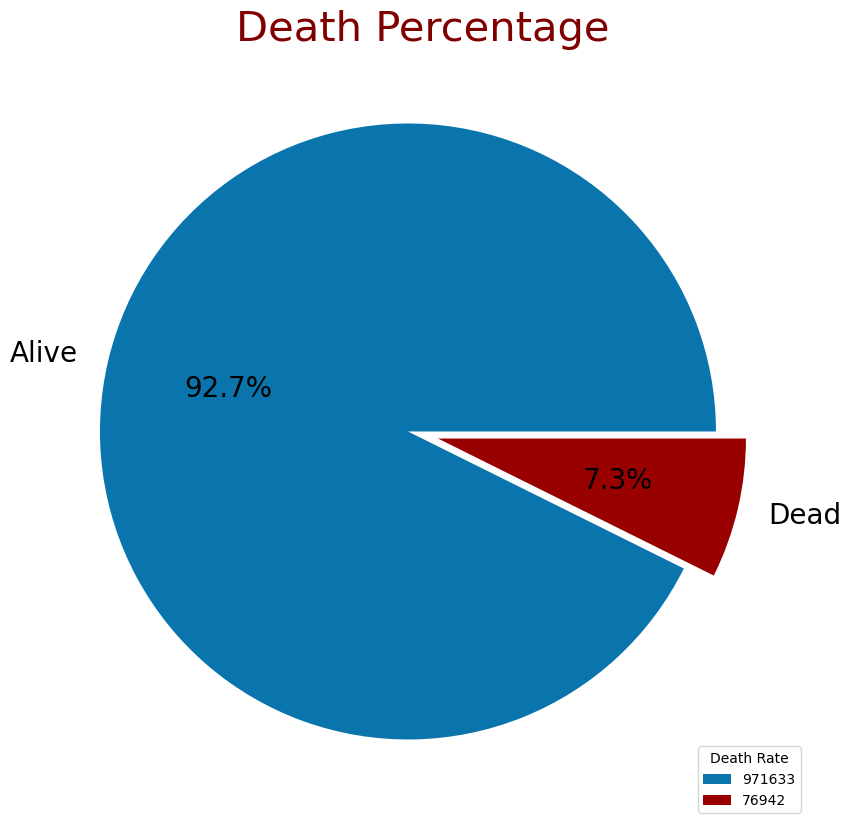

In [53]:
labels = ["Alive", "Dead"]
sizes = df['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage',color = '#800000',fontsize = 30)
plt.legend(df['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

### We can see that 76,942 patients have died representing 7.3% of the total number of patients in our dataset.

## 2-  And, did they all have the same results?

In [54]:
df_dead = df[df["DEAD"] == 1]
df_dead

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-03-05,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-03-06,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-12-06,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,2020-07-18,1.0,1.0,73.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1
1047636,1,13,2,1,2020-07-26,2.0,1.0,82.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047637,1,13,1,1,2020-07-27,2.0,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047638,1,13,2,2,2020-07-29,1.0,1.0,80.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1


In [55]:
df_dead["CLASIFFICATION_FINAL"].value_counts()

3    51430
7    13695
6     7652
2     1851
5     1211
1      955
4      148
Name: CLASIFFICATION_FINAL, dtype: int64

### We can see that we have dead patients with all "Classification" values starting from 1 till we go to 7, meaning we have dead people who were not diagnosed with Covid 19, and hence we can say that **the dead patients didn't have the same results with a majority of whom were being diagnosed with Covid 19**.

## 3- What is the percentage of Covid carriers among those dead patients?

In [56]:
def Covid_or_Not(val):
    if val >= 4:
        return "Not a Covid 19 Carrier"
    else:
        return "A Covid 19 Carrier"

In [57]:
df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

In [58]:
df_dead

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
0,2,1,1,1,2020-03-05,2.0,1.0,65.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1,2,1,2,1,2020-03-06,2.0,1.0,72.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1,Not a Covid 19 Carrier
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
3,2,1,1,1,2020-12-06,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1,Not a Covid 19 Carrier
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,2020-07-18,1.0,1.0,73.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1047636,1,13,2,1,2020-07-26,2.0,1.0,82.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1047637,1,13,1,1,2020-07-27,2.0,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1047638,1,13,2,2,2020-07-29,1.0,1.0,80.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier


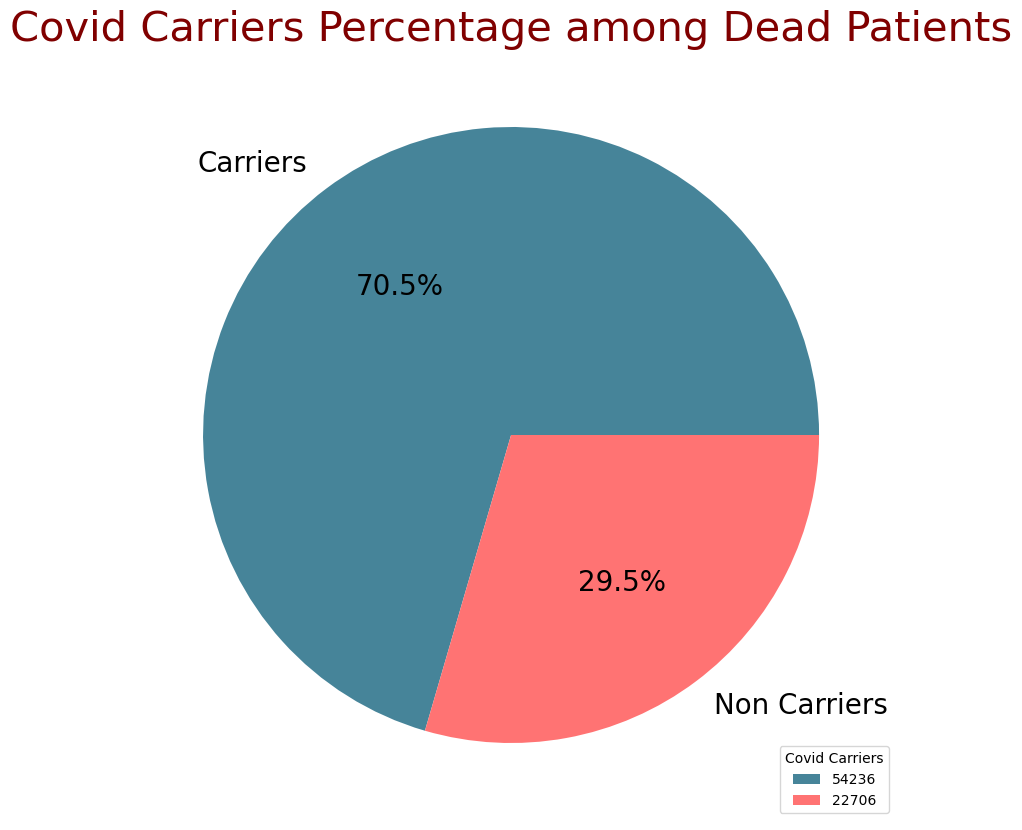

In [59]:
labels = ["Carriers", "Non Carriers"]
sizes = df_dead['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among Dead Patients', color = 'Maroon', fontsize = 30)
plt.legend(df_dead['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [60]:
df_dead["Covid_or_Not"].value_counts()

A Covid 19 Carrier        54236
Not a Covid 19 Carrier    22706
Name: Covid_or_Not, dtype: int64

### We can see that there are 54,236 patients who were carriers of Covid 19 among the dead with a percentage of 70.5%.

### That indicates the horrifying effect of the pandemic on the death rates back then!!

## 4- What about the percentage of Covid carriers among all the patients?

In [61]:
df['Covid_or_Not'] = df["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

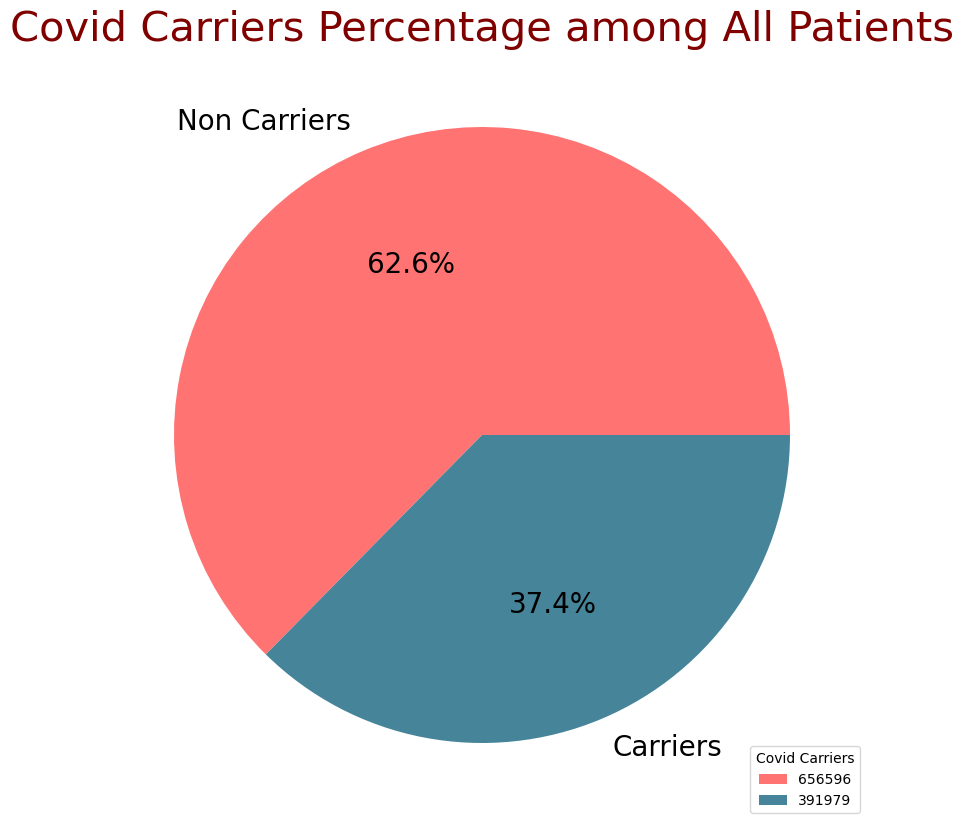

In [62]:
labels = ["Non Carriers", "Carriers"]
sizes = df['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among All Patients', color = 'Maroon', fontsize = 30)
plt.legend(df['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [63]:
df["Covid_or_Not"].value_counts()

Not a Covid 19 Carrier    656596
A Covid 19 Carrier        391979
Name: Covid_or_Not, dtype: int64

### We can see that there are 391,979 patients who were carriers of Covid 19 among all patients with a percentage of 37.4%.

### That indicates that the majority of the patients were non carriers of Covid 19.

## 5- What is the percentage of death among those carriers?

In [64]:
Covid_deaths = df[(df['Covid_or_Not'] == "A Covid 19 Carrier")]

In [65]:
Covid_deaths["DEAD"].value_counts()

0    337743
1     54236
Name: DEAD, dtype: int64

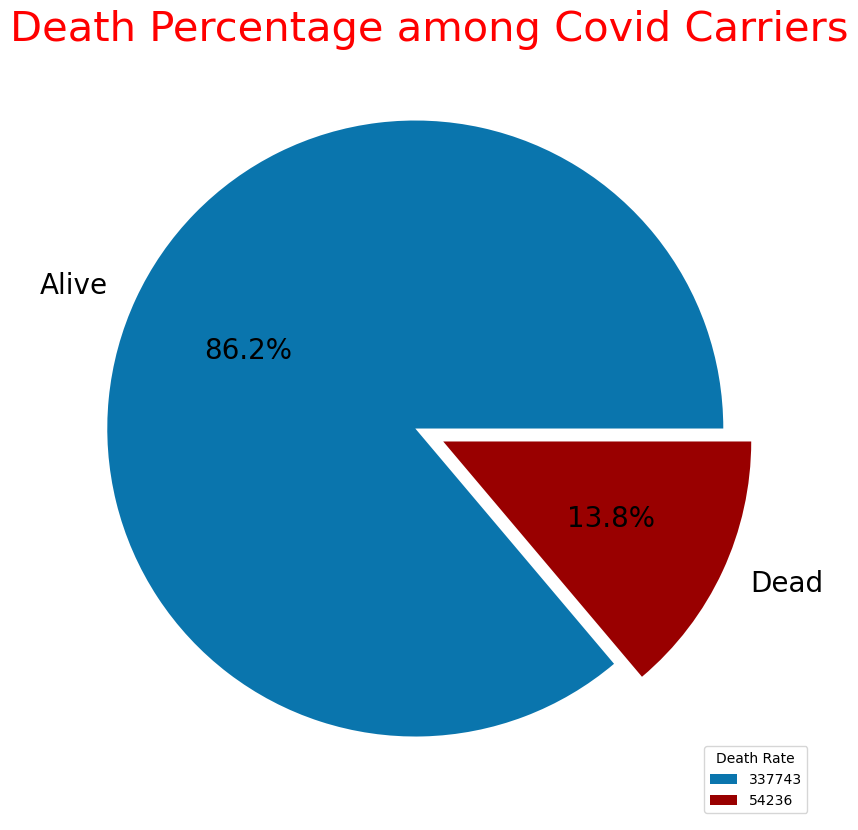

In [66]:
labels = ["Alive", "Dead"]
sizes = Covid_deaths['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage among Covid Carriers',color = 'red',fontsize = 30)
plt.legend(Covid_deaths['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

### Here we can see that the 54,236 patients with Covid 19 who have died, reperesented only 13.8% of all the carriers, which means that 86.2% were treated successfully, and the treatment was going well to a certain degree back then accros the world.

## 6- Is it true that age has some impact?

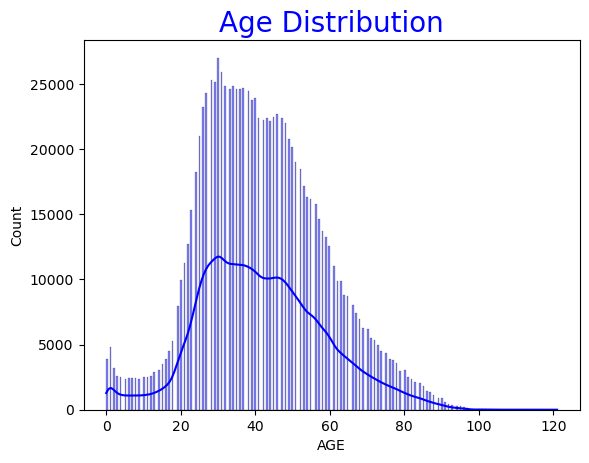

In [67]:
# Let's first check our age distribution
sns.histplot(x=df.AGE, kde = True, color = "blue")
plt.title('Age Distribution', color = 'blue', fontsize = 20)
plt.show()

### We notice that the majoriy are of people in their 20s up to late 50s.

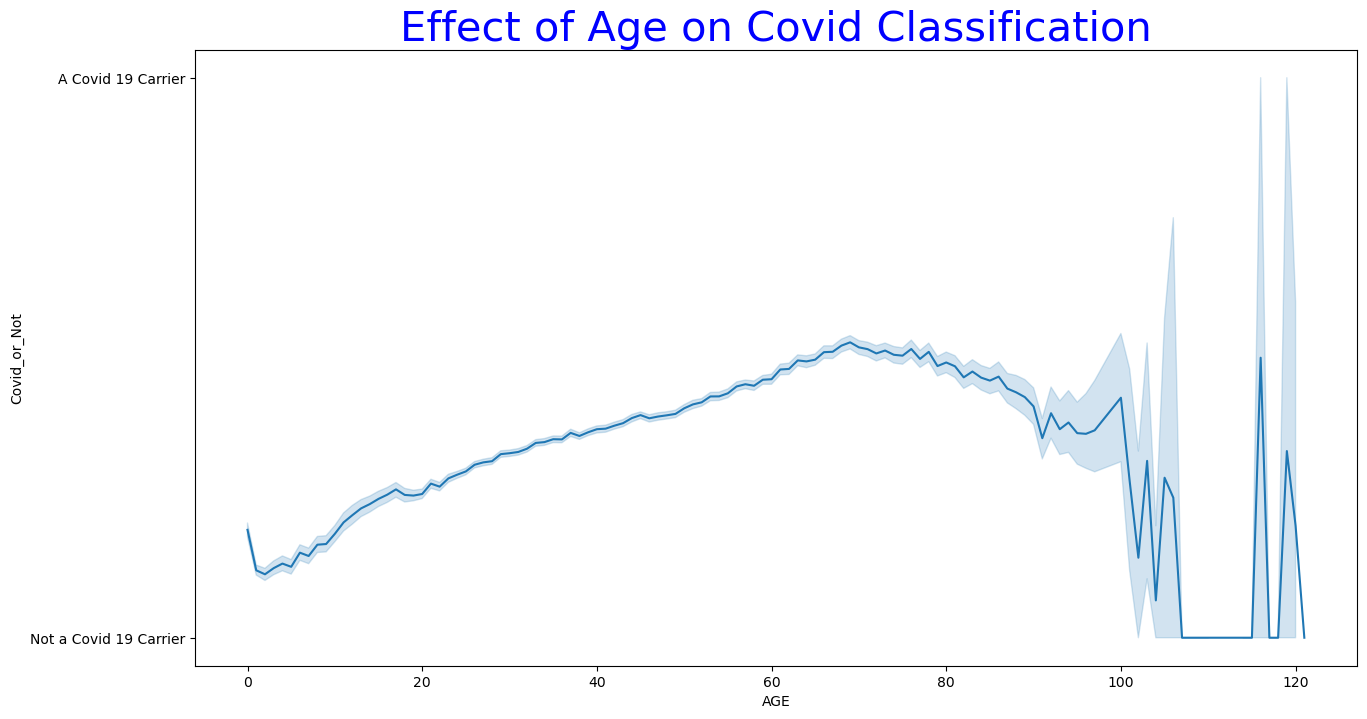

In [68]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="AGE", y="Covid_or_Not")
plt.title('Effect of Age on Covid Classification', color = 'blue', fontsize = 30)
plt.show()

### As we can see that as age increases probability of getting diagnosed with Covid increases (with the exception of the suspected missing values we've already discussed of ages between 100 and 120), which proves that **indeed age has an impact**.

## 7- Does obesity has an impact?

In [69]:
df_mod = df.copy()

In [70]:
df_mod['OBESITY'] = ["Obese" if i==1 else "Not Obese" for i in df.OBESITY]

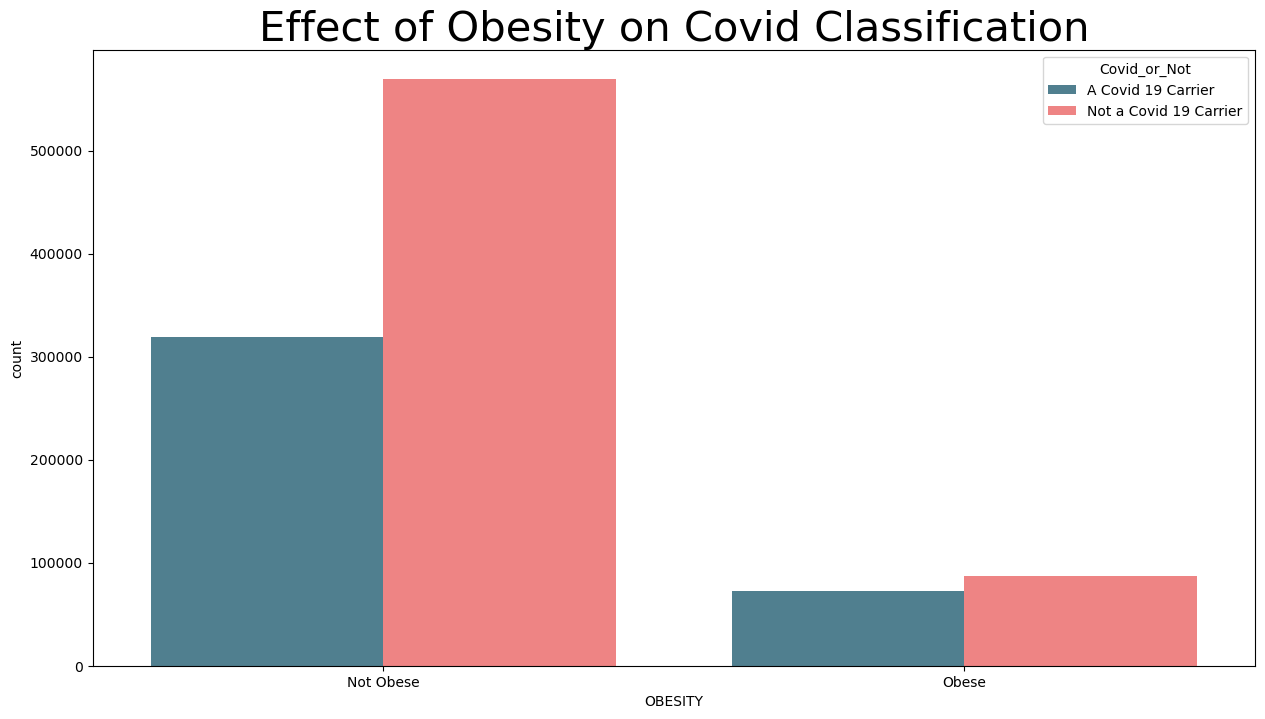

In [71]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="OBESITY", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Obesity on Covid Classification', color = 'black', fontsize = 30)
plt.show()

### We can see that for patients with obesity the ratio is so close and they are also a minority, while for patients who don't suffer from obesity the ratio is about 1:2, meaning that **for every 100 patients who are suffering from obesity there is a chance for about 48 of them to carry Covid**.

### So according to our analysis, **people who are suffering form obesity are more likely to carry Covid**.

## 8- Does gender has any impact?

In [72]:
df_mod['SEX'] = ["Female" if i==1 else "Male" for i in df.SEX]

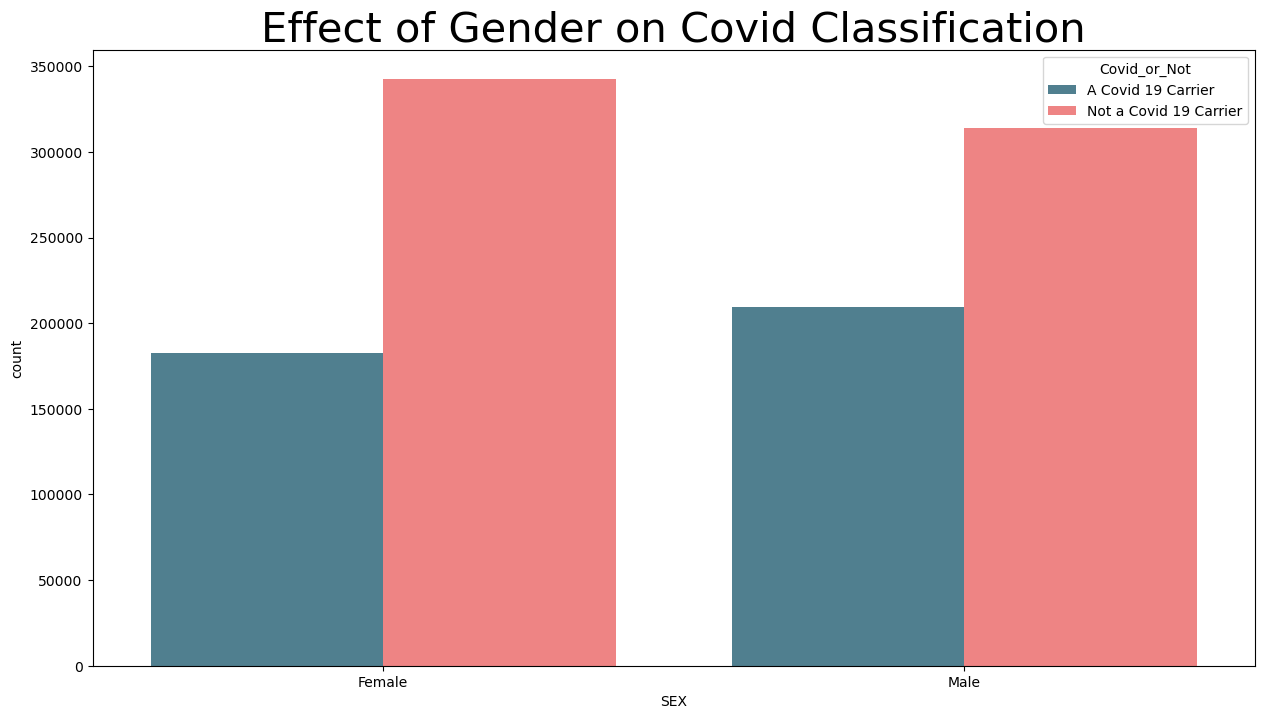

In [73]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="SEX", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Gender on Covid Classification', color = 'black', fontsize = 30)
plt.show()

### We can see that **gender has no effect or impact**, with males being slightly more likely to carry Covid than females but the difference doesn't really matter.

## 9- Does pregnancy has any impact?

In [74]:
df_preg = df[df["SEX"] == 1]
df_preg["PREGNANT"].value_counts()

2.0    513179
1.0      8131
Name: PREGNANT, dtype: int64

In [75]:
df_preg['PREGNANT'] = ["Pregnant" if i==1 else "Non Pregnant" for i in df_preg.PREGNANT]

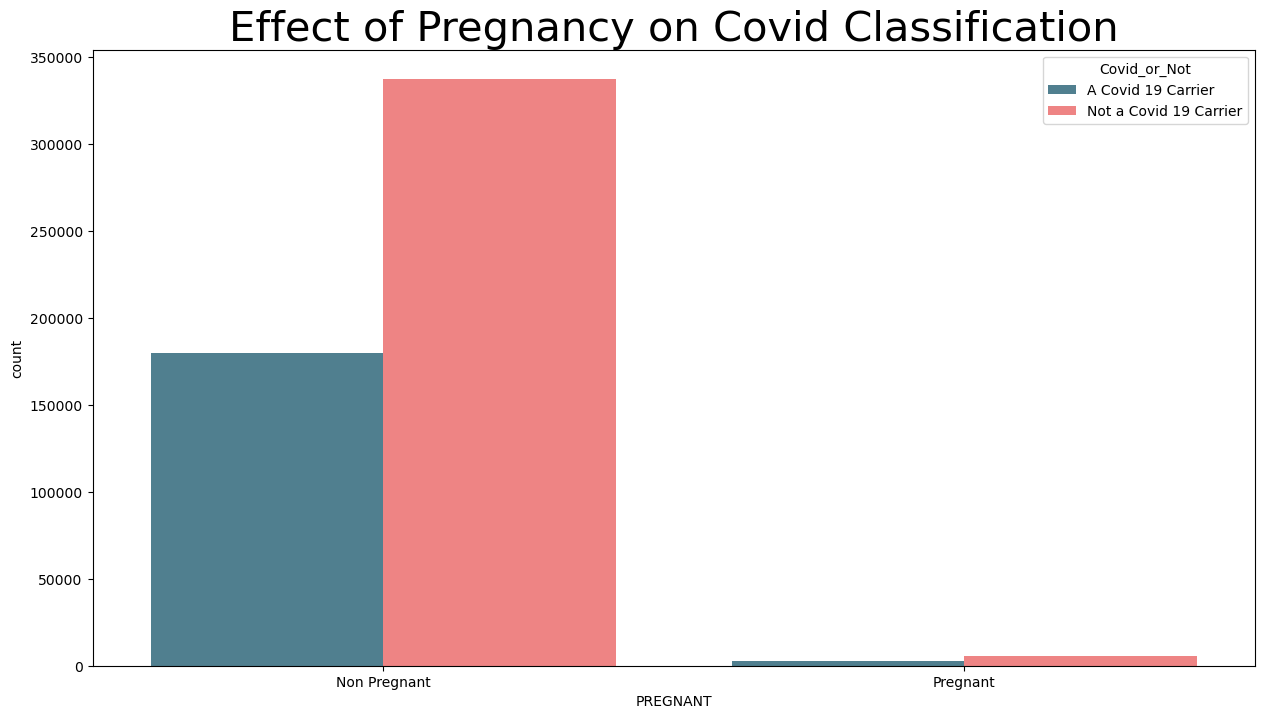

In [76]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_preg, x="PREGNANT", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Pregnancy on Covid Classification', color = 'black', fontsize = 30)
plt.show()

### We can not determine from the above chart; as the pregnant ratio is not visible, during the low amount of pregnant females across our data.

### So, let's try another approach:

In [77]:
df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()

Not a Covid 19 Carrier    5377
A Covid 19 Carrier        2754
Name: Covid_or_Not, dtype: int64

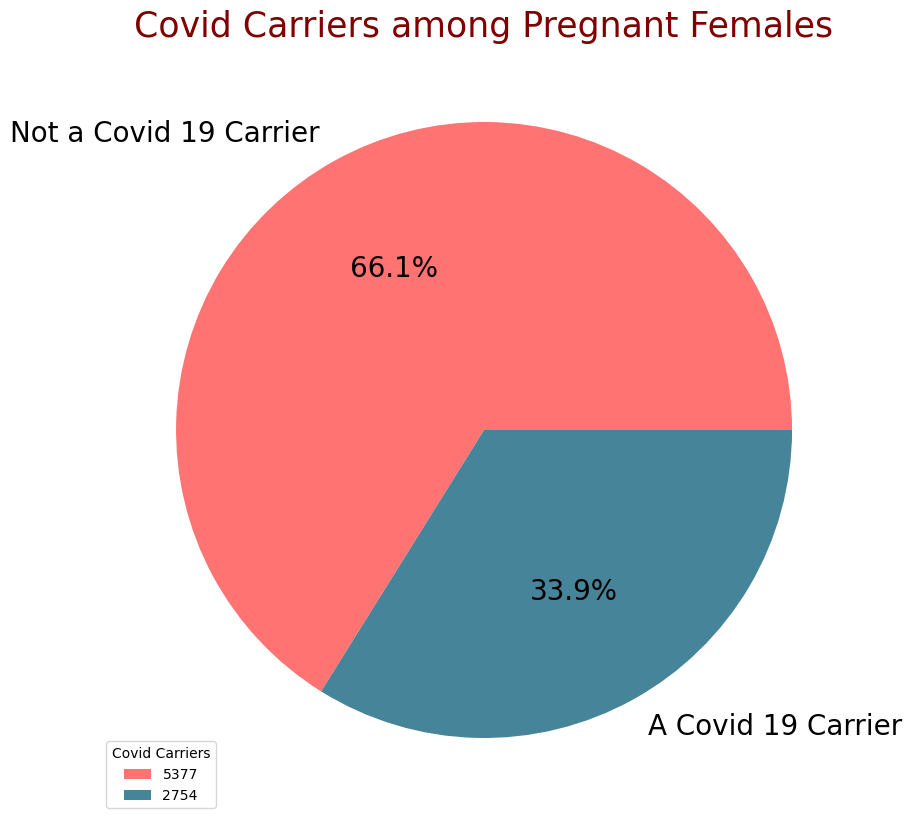

In [78]:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

In [79]:
df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts()

Not a Covid 19 Carrier    337197
A Covid 19 Carrier        179736
Name: Covid_or_Not, dtype: int64

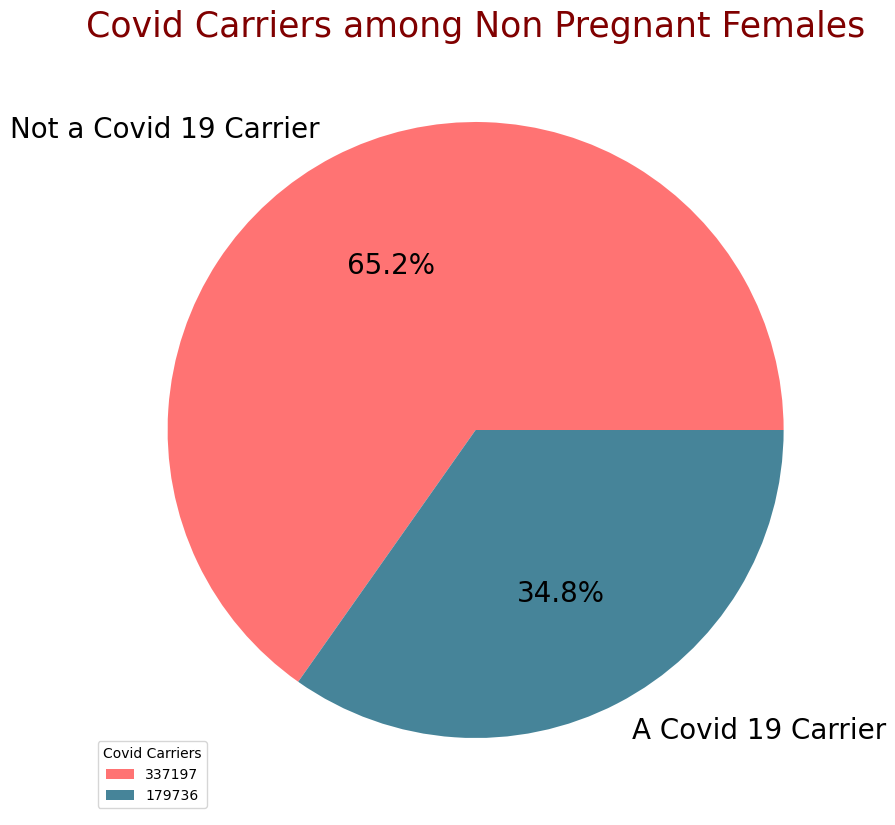

In [80]:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Non Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Non Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

### From the above two charts, we can see that both percentages are pretty much close.

### So based on our analysis here, **we can not see any impact from pregnancy on Covid classification**.

## 10- Do other diseases affect the patient classification?

In [81]:
df_med

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEAD
0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048571,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0
1048572,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048573,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [82]:
df_diseases = df_med.drop(columns = ["PREGNANT", "OBESITY", 'DEAD'])

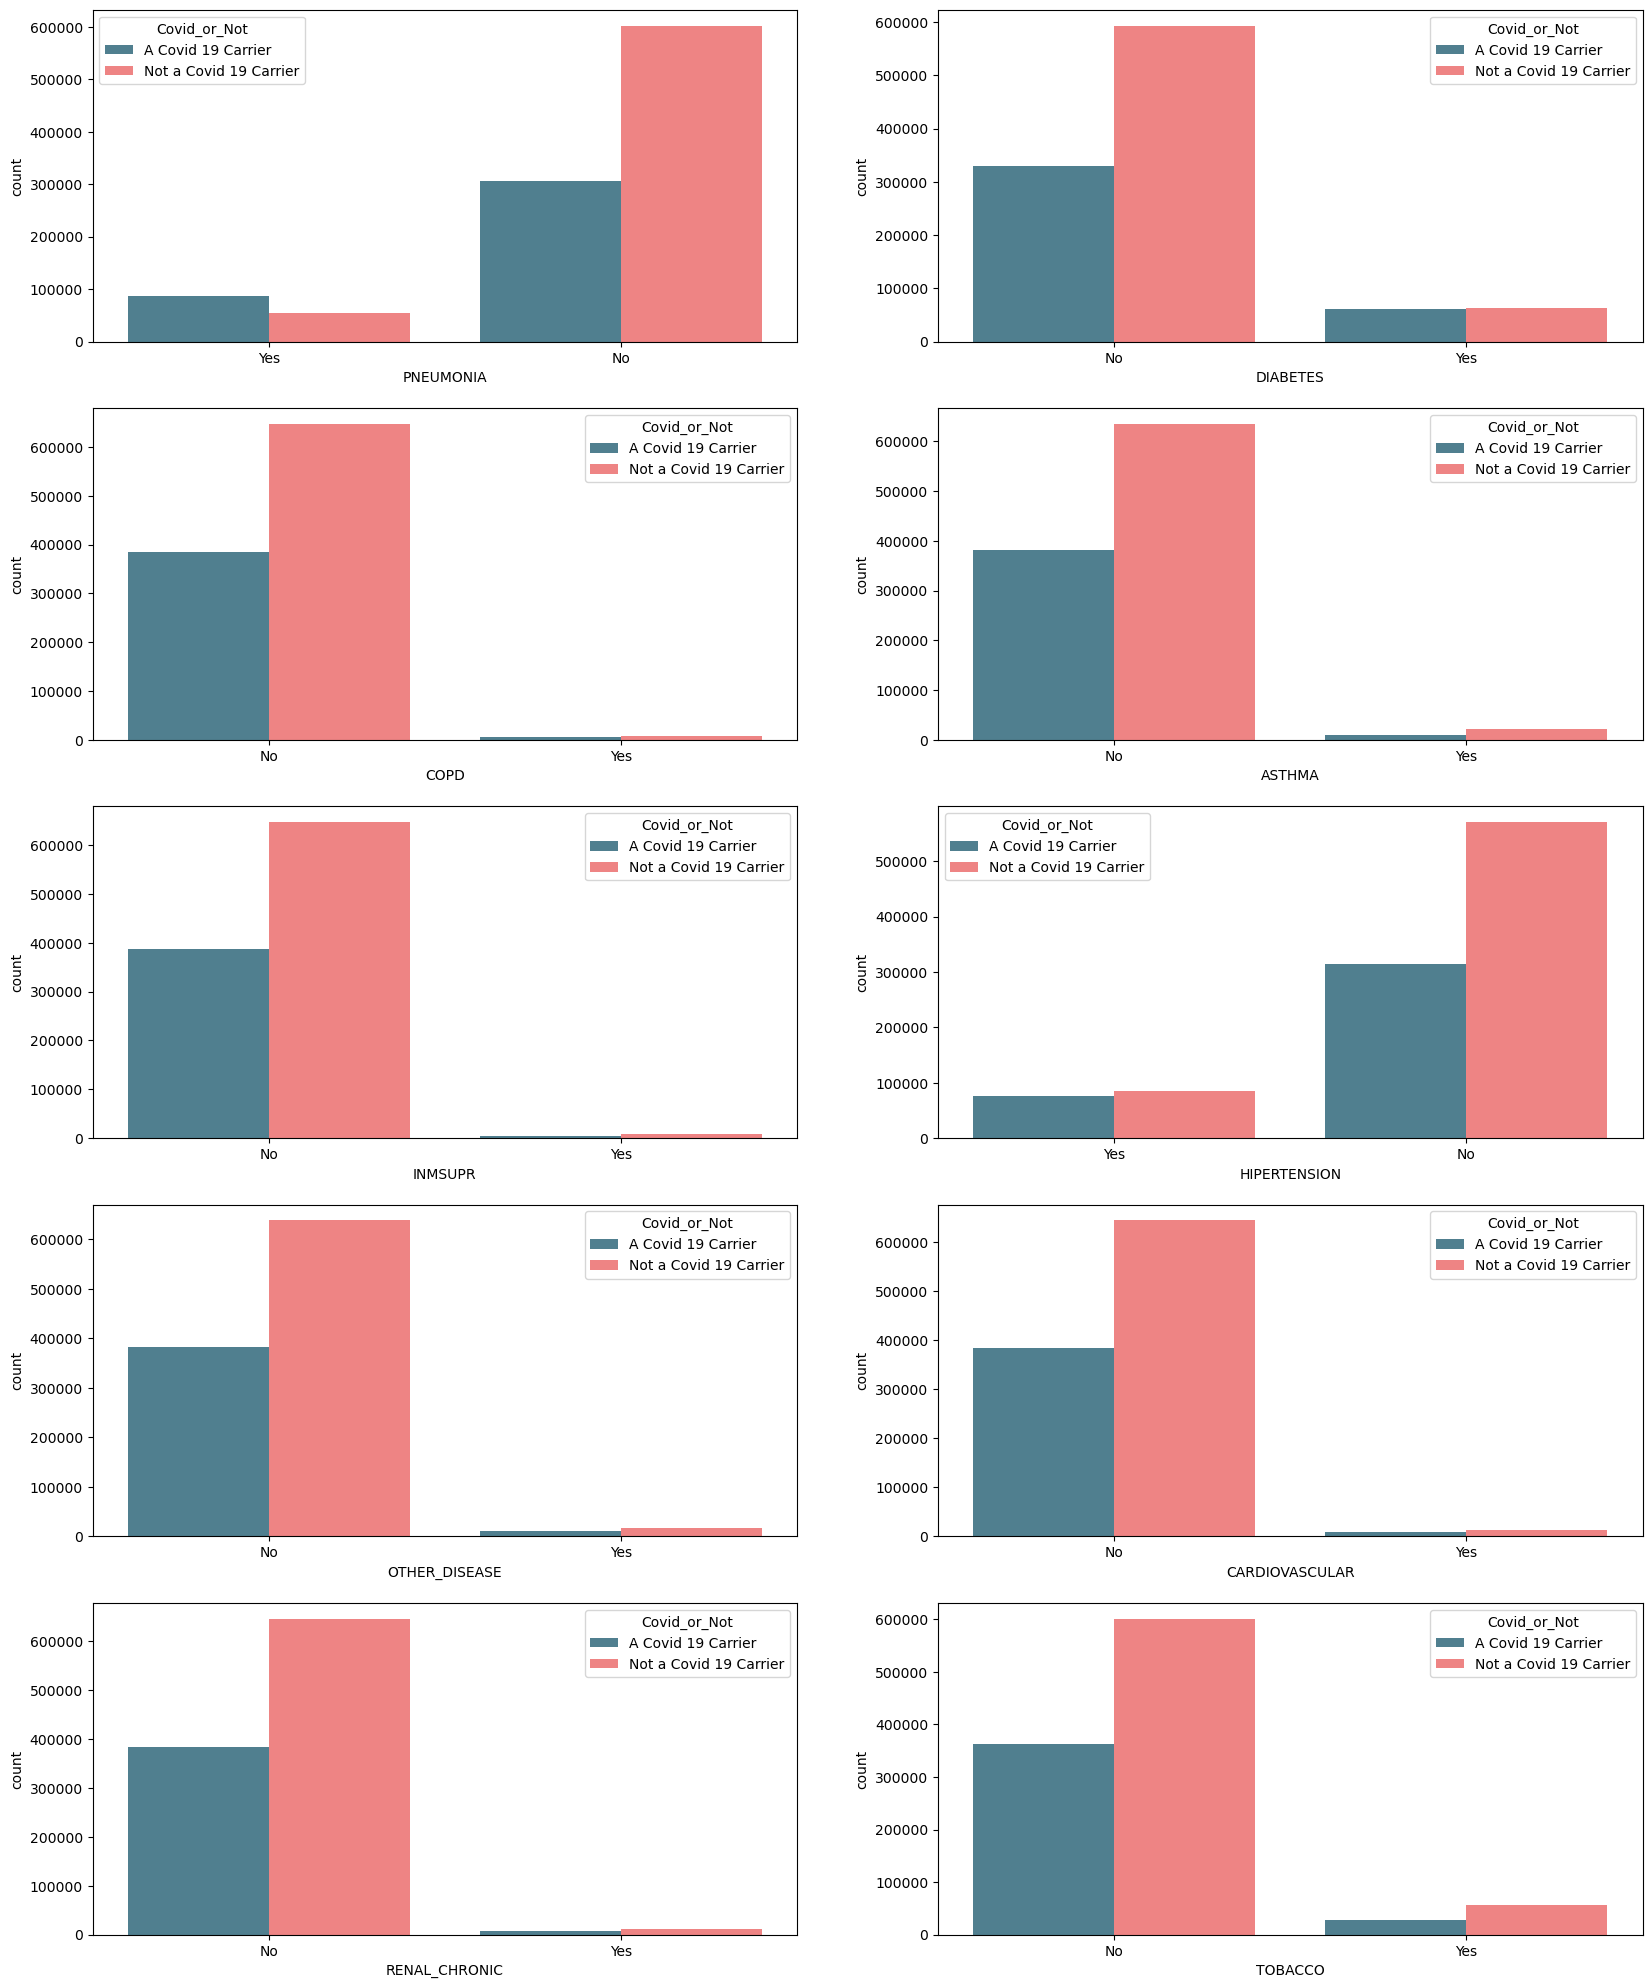

In [83]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    df_diseases[i] = ["Yes" if j==1 else "No" for j in df_diseases[i]]
    sns.countplot(data=df_diseases, x=i, hue=df["Covid_or_Not"], palette = ['#468499', '#ff7373'])
    index += 1
plt.show()

### We noticed that the following diseases and habits have the highest impact:
#### 1- Pneumonia
#### 2- Hypertension
#### 3- Diabetes
#### 4- Tobacco usage

### We also notice that Pneumonia patients are more likely to carry Covid with a higher ratio.

## Let's dig deeper into the 7 classifications:

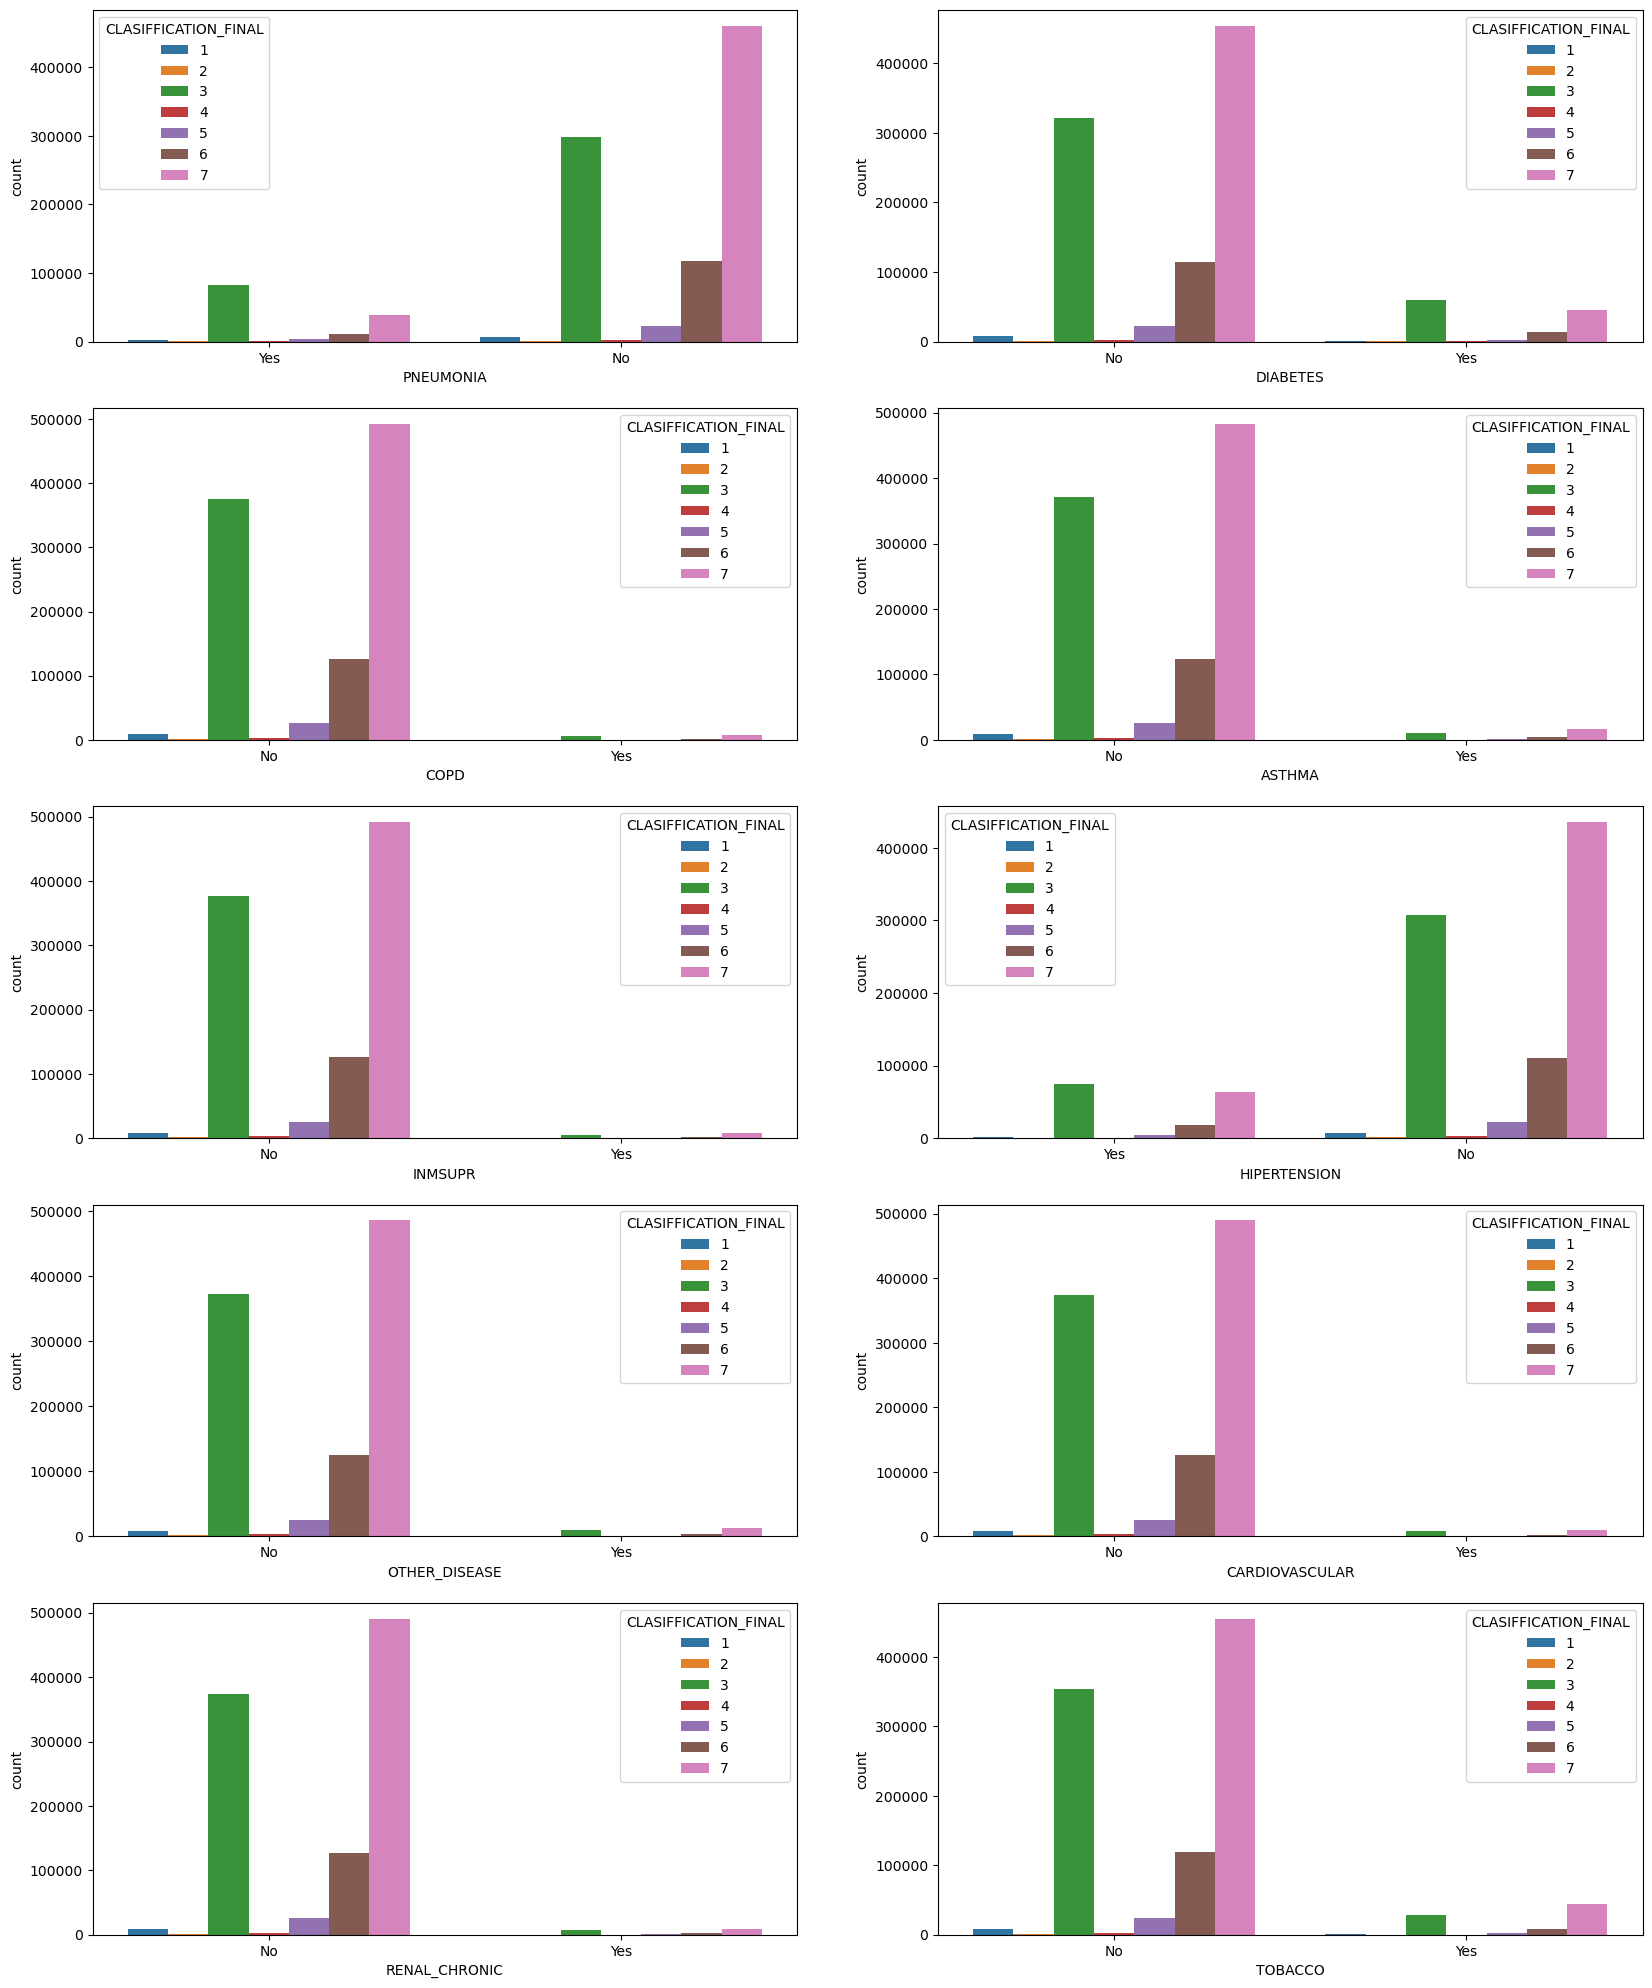

In [84]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    sns.countplot(data=df_diseases, x=i, hue=df['CLASIFFICATION_FINAL'],)

    index += 1
plt.show()

### We can see that among all the patients of these diseases who also carry Covid, **the 3rd classification is the highest by far**.

## 11- How many patients were hospitalized?

In [85]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')

In [86]:
df['PATIENT_TYPE'].value_counts()

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

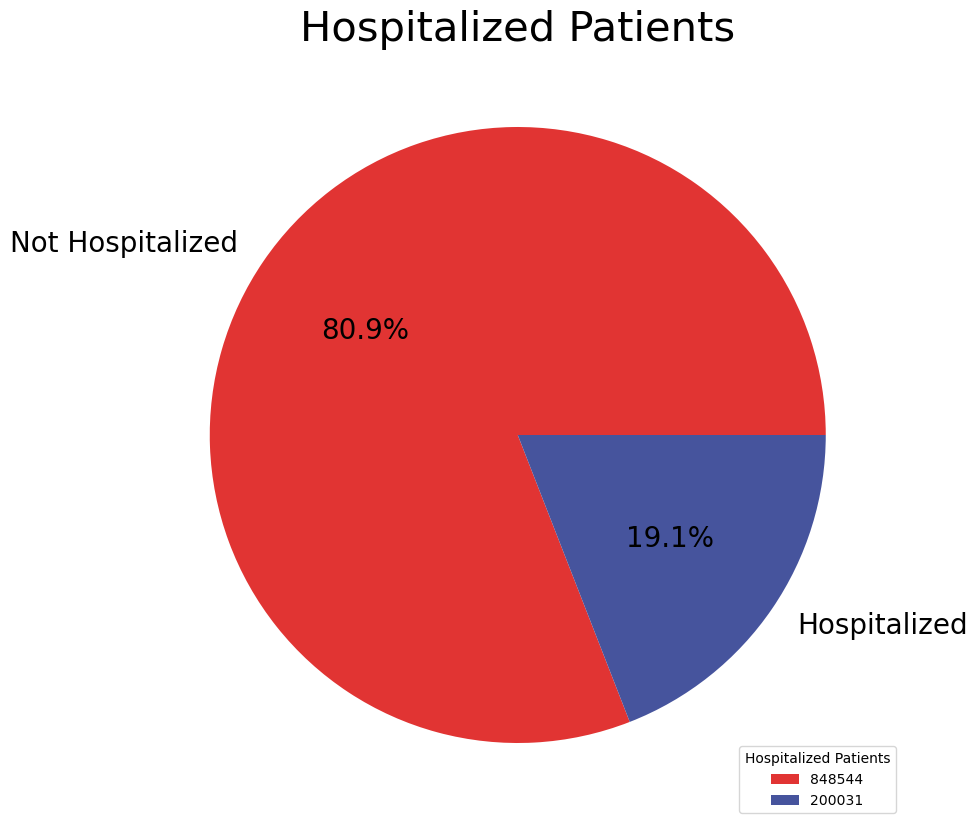

In [87]:
labels = ["Not Hospitalized", "Hospitalized"]
sizes = df['PATIENT_TYPE'].value_counts()
colors = ['#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('Hospitalized Patients',color = 'black',fontsize = 30)
plt.legend(df['PATIENT_TYPE'].value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

### 200,031 patients were hospitalized with a percentage of 19.1%

## 12- How many of them (hospitalized people) have died?

In [88]:
df_hosp = df[df['PATIENT_TYPE']==2]

In [89]:
df_hosp['DEAD'] = df_hosp['DEAD'].replace(1, "Dead")
df_hosp['DEAD'] = df_hosp['DEAD'].replace(2, "Alive")

In [90]:
df_hosp['DEAD'].value_counts()

0       129965
Dead     70066
Name: DEAD, dtype: int64

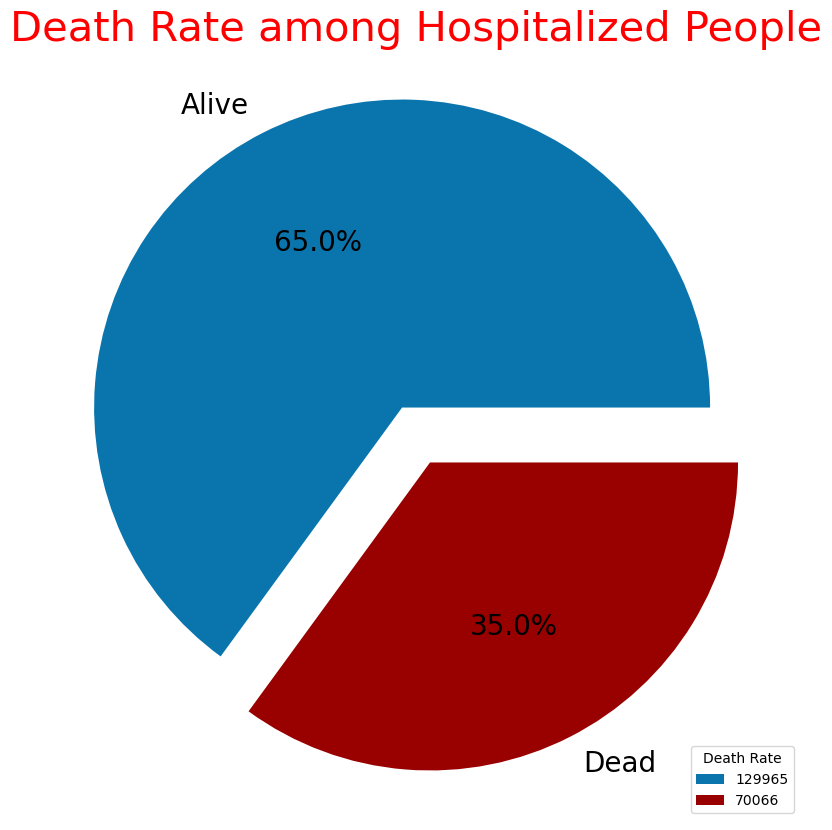

In [91]:
labels = ["Alive", "Dead"]
sizes = df_hosp['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among Hospitalized People', color = 'red', fontsize = 30)
plt.legend(df_hosp['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

###  Among 200,031 total hospitalized patients, 70,066 patients have died unfortunately, with a percentage of 35% which is a great margin.

### This indicates that the hospitalized people were at high risk and although we lost about 35% of them, we could due to treatment save the rest.

### Let's check those 35% for their diseases and compare them to the rest (65%) to see if there were any indications that led to their unfortunate death

In [92]:
print(df_diseases.shape)
print(df_diseases.columns)

(1048575, 10)
Index(['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'TOBACCO'],
      dtype='object')


In [93]:
print(df_hosp.shape)
print(df_hosp.columns)

(200031, 23)
Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')


In [94]:
df_diseases2 = df_hosp.drop(columns = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
                                      'AGE', "PREGNANT", "OBESITY",'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
                                       'Covid_or_Not'])

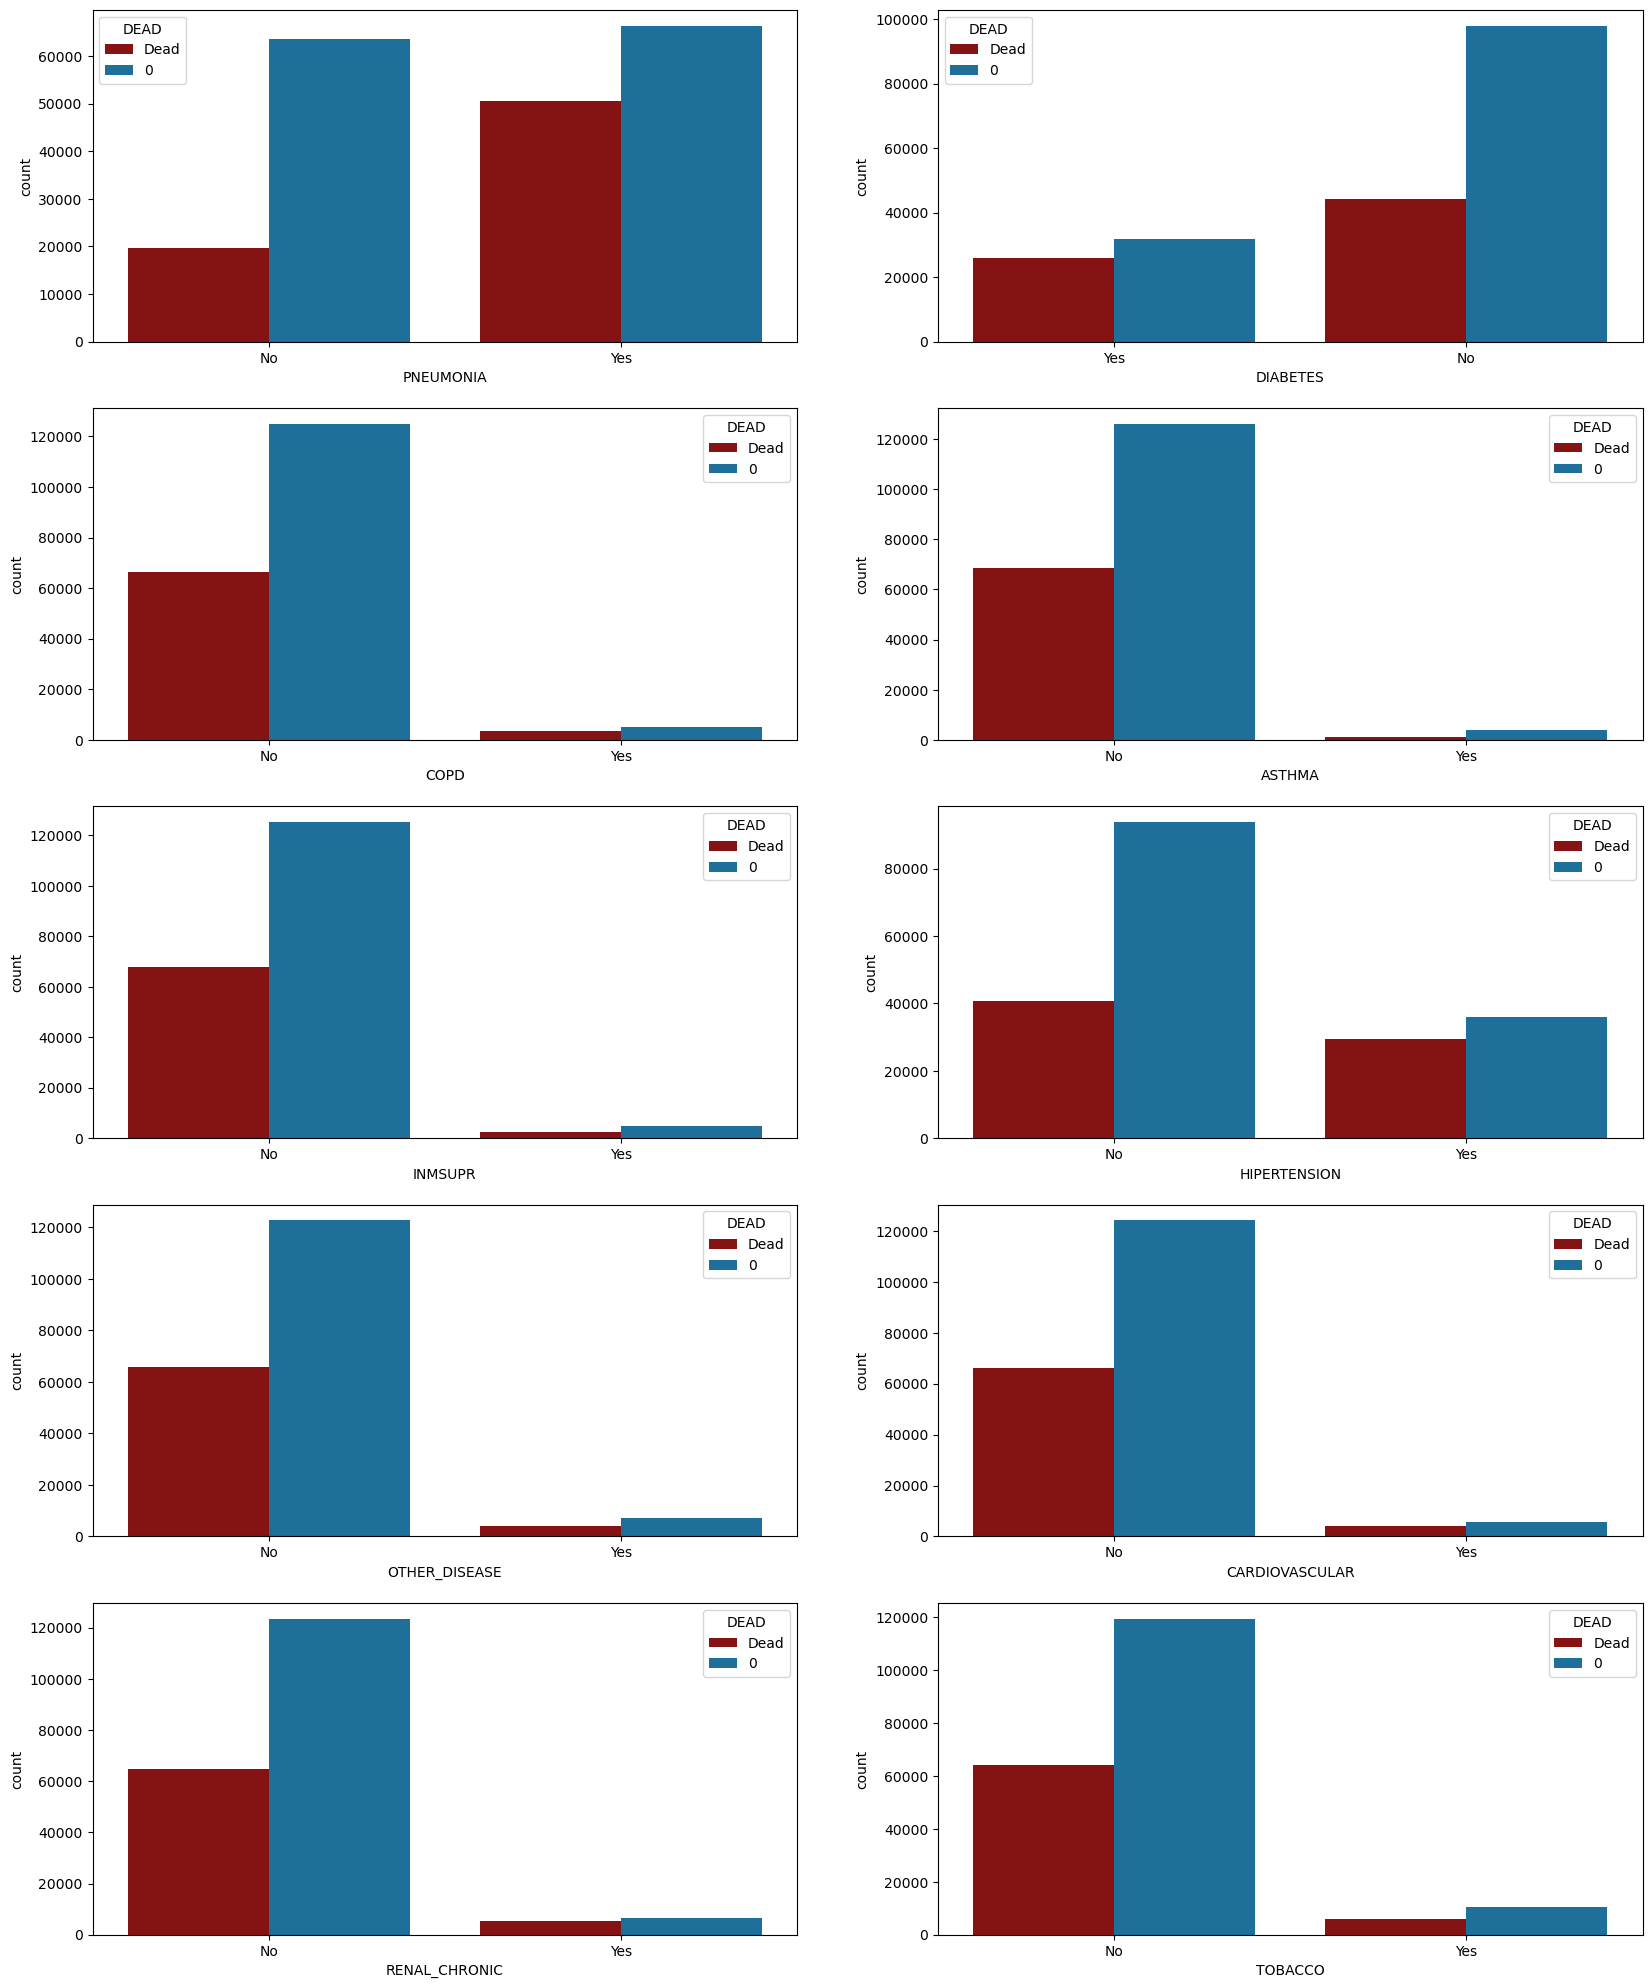

In [95]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases2.columns:
    plt.subplot(5, 2, index)
    df_diseases2[i] = ["Yes" if j==1 else "No" for j in df_diseases2[i]]
    sns.countplot(data=df_diseases2, x=i, hue=df_hosp['DEAD'],
                  palette = [ '#990000', '#0a75ad'])
    index += 1
plt.show()

### We can see that most of those 35% didn't have any of those diseases except for those who had the following diseases:
#### 1- Pneumonia
#### 2- Hypertension
#### 3- Diabetes

### But we can also notice that the only disease that has a great impact on the death rate among the hospitalized patients is the "Pneumonia" disease, which makes perfect sense; as it's a lung diseas in the first place.

## 13- How many of the dead patients were hospitalized?

In [96]:
df_dead.PATIENT_TYPE.value_counts()

2    70066
1     6876
Name: PATIENT_TYPE, dtype: int64

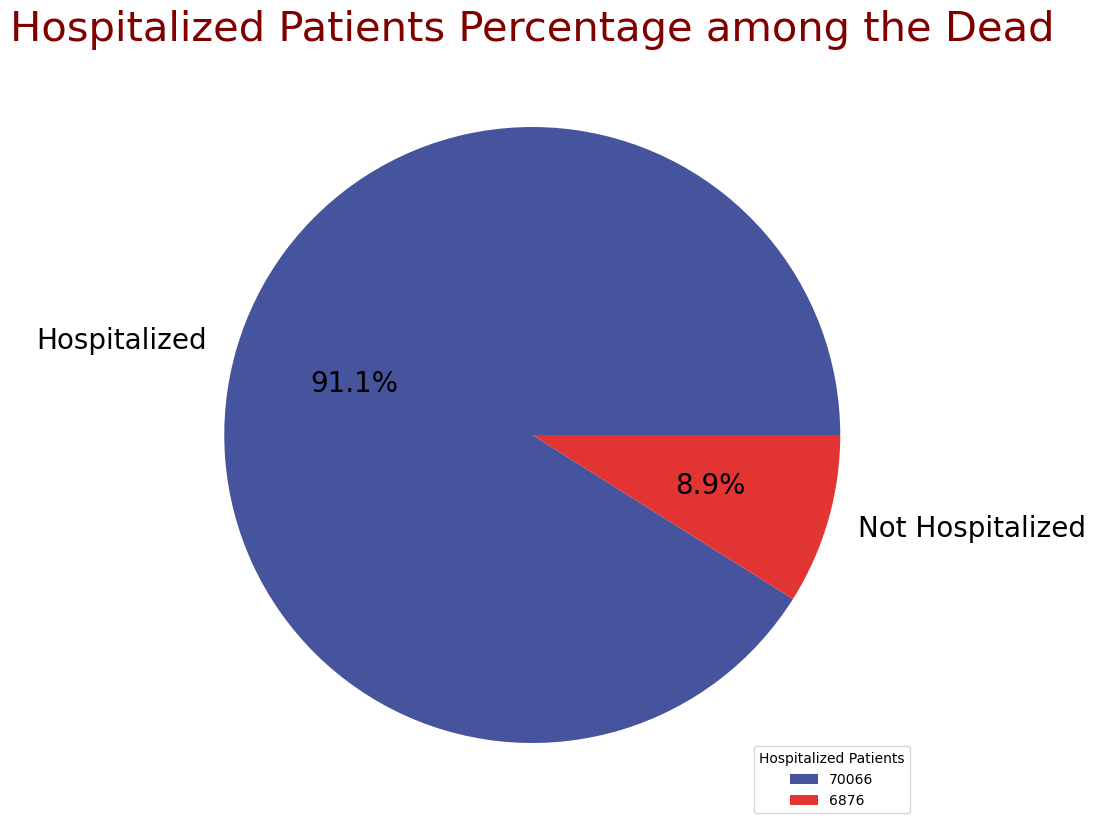

In [97]:
labels = ["Hospitalized", "Not Hospitalized"]
sizes = df_dead.PATIENT_TYPE.value_counts()
colors = ['#46549d', '#e13433']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Hospitalized Patients Percentage among the Dead', color = 'Maroon', fontsize = 30)
plt.legend(df_dead.PATIENT_TYPE.value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

### There are 70,066 patients who were hospitalized among the dead, with a great percentage of 91.1%, which makes sense and indicates that only few patients have died after sending them home just after getting classified.

## 14- How many of those hospitalized patients had been admitted to the ICU?

In [98]:
df[(df['PATIENT_TYPE'] == 2) & (df['ICU'] == 1)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
16,2,1,1,2,NaT,2.0,1.0,80.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
20,2,1,2,2,NaT,2.0,1.0,59.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3,1.0,0,A Covid 19 Carrier
41,2,1,2,2,NaT,1.0,1.0,45.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
56,2,1,1,2,NaT,1.0,1.0,58.0,2.0,2.0,...,1.0,2.0,1.0,1.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
57,2,1,1,2,NaT,1.0,1.0,48.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048255,1,13,2,2,NaT,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
1048270,2,13,1,2,NaT,1.0,1.0,22.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
1048358,1,13,1,2,NaT,1.0,2.0,44.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
1048364,1,13,2,2,NaT,1.0,1.0,55.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,1.0,7,1.0,0,Not a Covid 19 Carrier


In [99]:
df.ICU.value_counts()

2.0    1024229
1.0      16858
Name: ICU, dtype: int64

In [100]:
df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts()

2.0    175685
1.0     16858
Name: ICU, dtype: int64

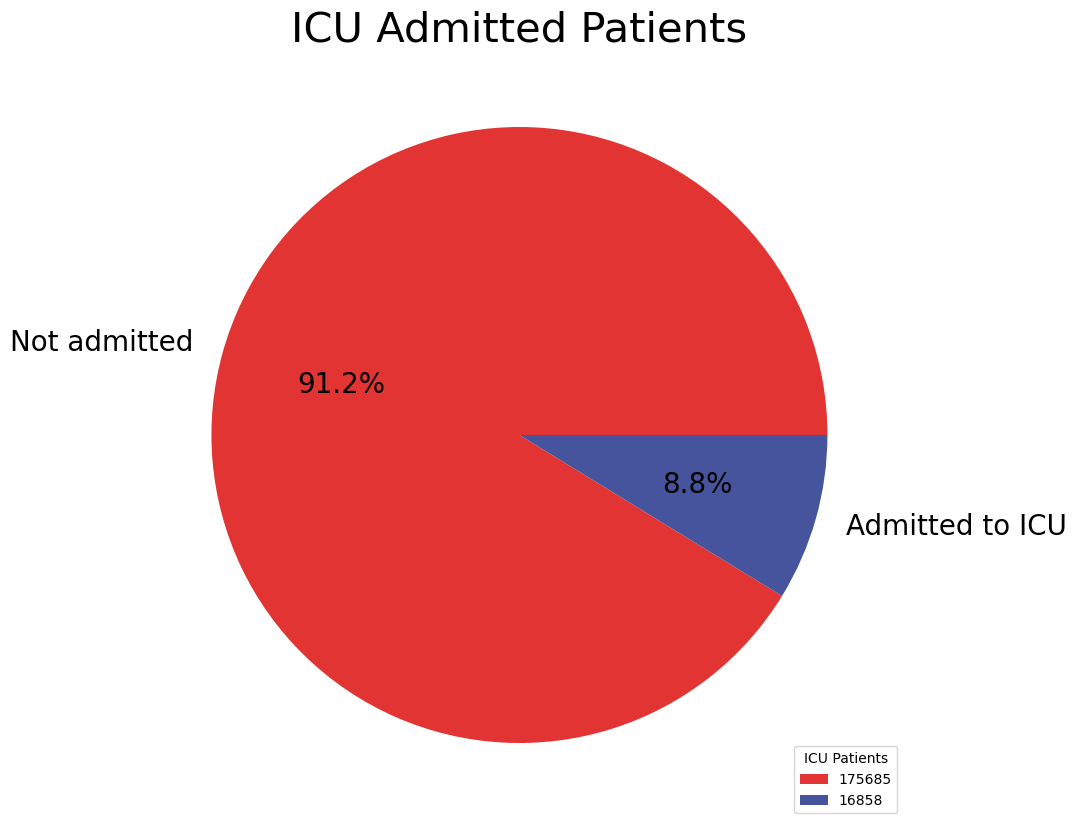

In [101]:
labels = ["Not admitted", "Admitted to ICU"]
sizes = df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts()
colors = [ '#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('ICU Admitted Patients',color = 'black',fontsize = 30)
plt.legend(df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts(), loc = 'lower right',
           title = 'ICU Patients')
plt.show()

### There are 16858 patients who had been admitted to the ICU with a percentage of 8.8% out of the total hospitalized patients

## 15- How many of those ICU admitted patients had been classified with Covid?

In [102]:
df[(df['CLASIFFICATION_FINAL'] < 4) & (df['ICU'] == 1)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
16,2,1,1,2,NaT,2.0,1.0,80.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
20,2,1,2,2,NaT,2.0,1.0,59.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3,1.0,0,A Covid 19 Carrier
41,2,1,2,2,NaT,1.0,1.0,45.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
340,1,3,2,2,2020-06-04,1.0,1.0,90.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,1,A Covid 19 Carrier
341,1,3,2,2,2020-07-04,1.0,1.0,61.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,1.0,1,A Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047735,1,13,2,2,NaT,1.0,1.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
1047737,1,13,2,2,NaT,2.0,2.0,56.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
1047740,1,13,2,2,NaT,2.0,1.0,68.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
1047750,1,13,2,2,NaT,1.0,2.0,35.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier


In [103]:
16858 - 10449

6409

### There are 6409 patients with no Covid 19 that had been admitted to an Intensive Care Unit, maybe due to other illnesses or diseases.

In [104]:
df[(df['ICU'] == 1)]['CLASIFFICATION_FINAL'].value_counts()

3    10097
7     4951
6      953
5      465
1      255
2       97
4       40
Name: CLASIFFICATION_FINAL, dtype: int64

### As expected patients with classification of the 3rd degree are the majority, and we can also notice that patients with covid are much more than non carriers.

In [105]:
df[(df['ICU'] == 1)]['Covid_or_Not'].value_counts()

A Covid 19 Carrier        10449
Not a Covid 19 Carrier     6409
Name: Covid_or_Not, dtype: int64

### We' ve got 10,449 patients who were carriers of Covid among the ICU.

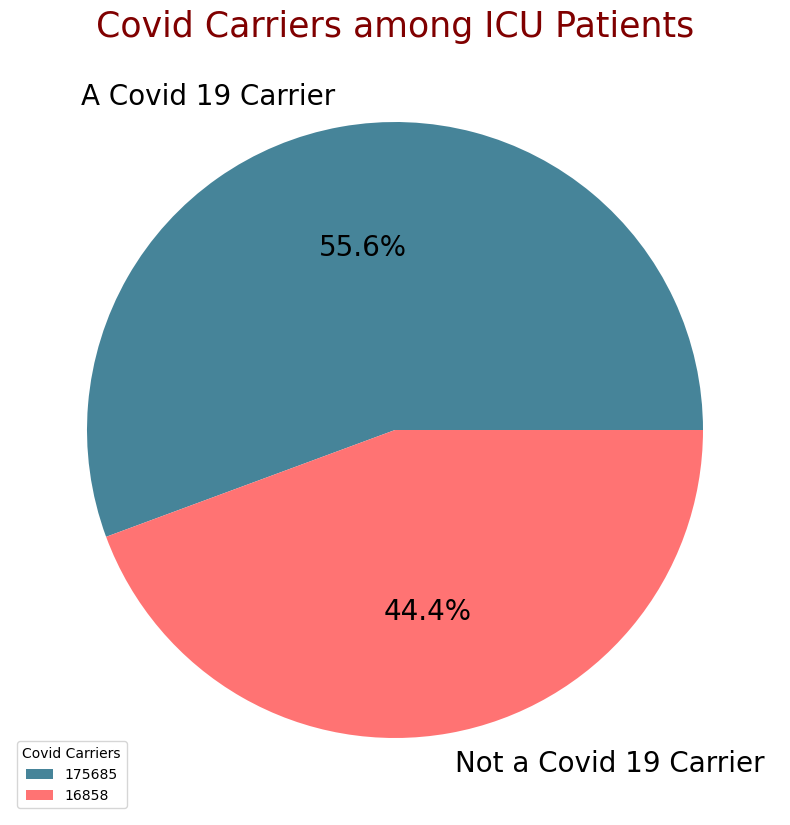

In [106]:
labels = ["A Covid 19 Carrier", "Not a Covid 19 Carrier"]
sizes = df[(df['PATIENT_TYPE'] == 2)]['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among ICU Patients', color = 'maroon', fontsize = 25)
plt.show()

### We can see the huge percentage of the Covid carriers (91.2%) among the ICU admitted patients.

## 16 - How many of those ICU patients have died?

In [107]:
df[(df['ICU'] == 1)]['DEAD'].value_counts()

0    8663
1    8195
Name: DEAD, dtype: int64

### We' ve got 8,195 dead patients among the ICU.

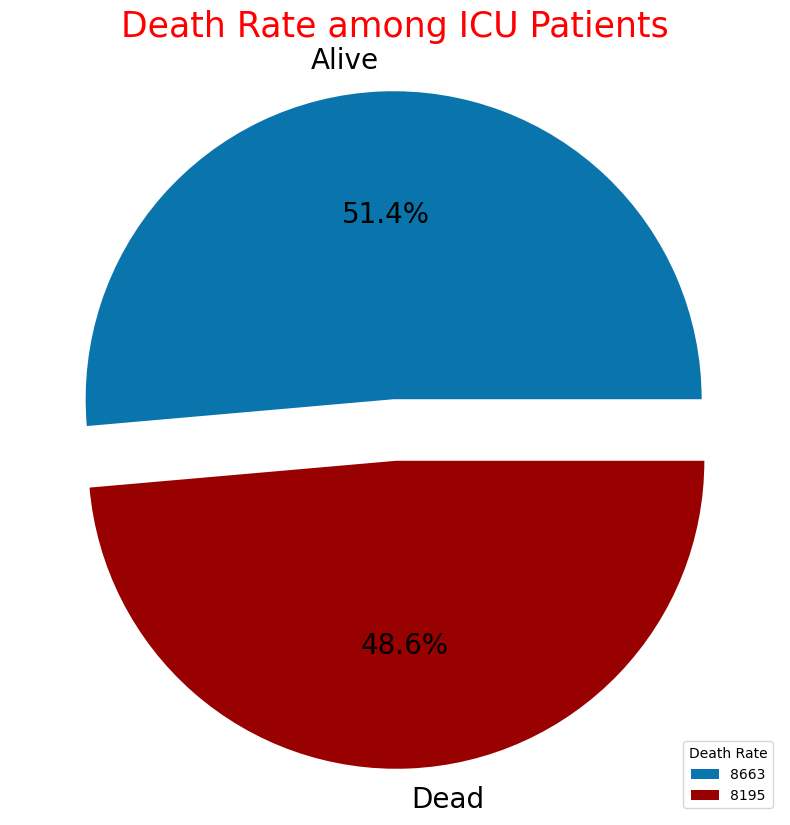

In [108]:
labels = ["Alive", "Dead"]
sizes = df[(df['ICU'] == 1)]['DEAD'].value_counts()
colors = [ '#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among ICU Patients', color = 'red', fontsize = 25)
plt.legend(df[(df['ICU'] == 1)]['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

### Unfortantely about 48.6% of ICU admitted patients have died which is a great percentage, indicating the great losses we found at the ICU; because ICU patients are always at great risk and degrading medical conditions.

In [109]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')

## 17- What is the death trend with respect to time?

Text(0.5, 1.0, 'Death Trend through Time')

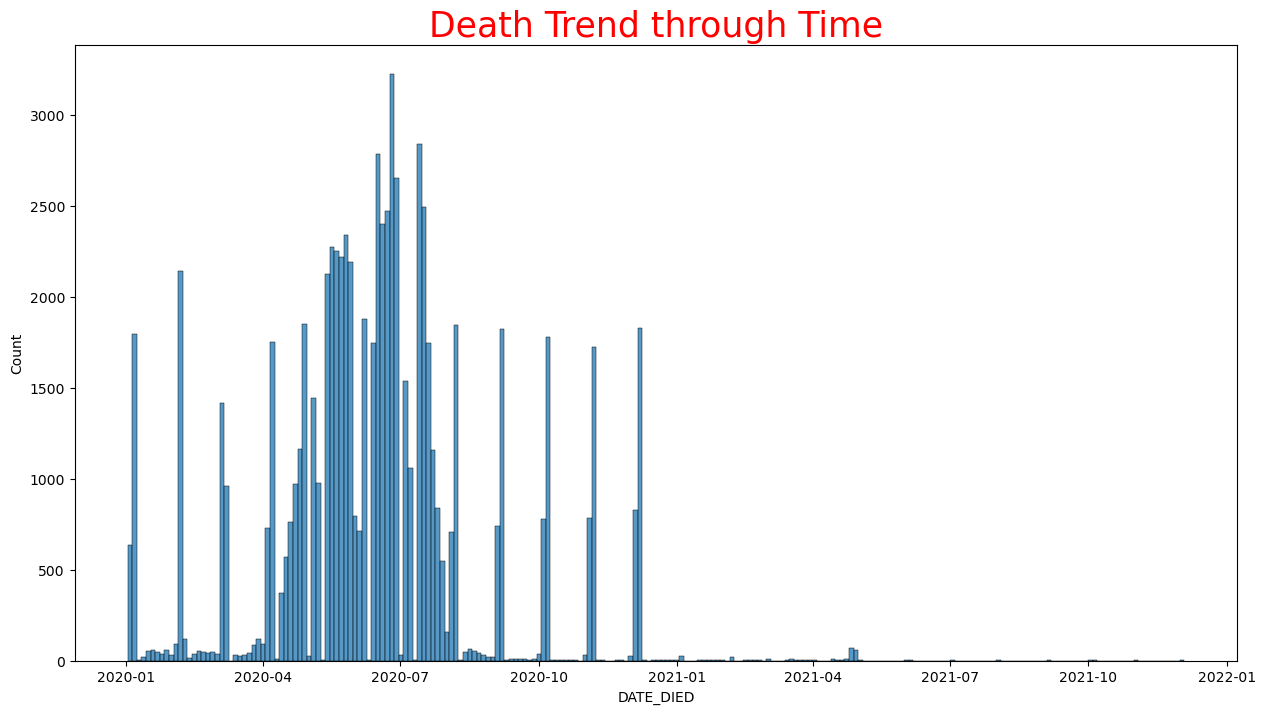

In [110]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x="DATE_DIED")
plt.title('Death Trend through Time', color = 'red', fontsize = 25)

### We can see that deaths were occuring with high rate at year 2020 specially at the middle of the year (months from April till August).

-------------------

# Modeling and Results

## Feature Selection

In [111]:
df_model = df.drop(columns=['DATE_DIED','SEX'])

In [112]:
df_model.dropna().shape

(1019473, 21)

In [113]:
df_model.shape

(1048575, 21)

In [114]:
1048575 - 1019473

29102

In [115]:
29102 / 1048575

0.027753856424194742

### We can now remove the missing values as they are considered as a great minority in our data with a maximum of about 0.03%.

In [116]:
df_model.dropna(inplace = True)

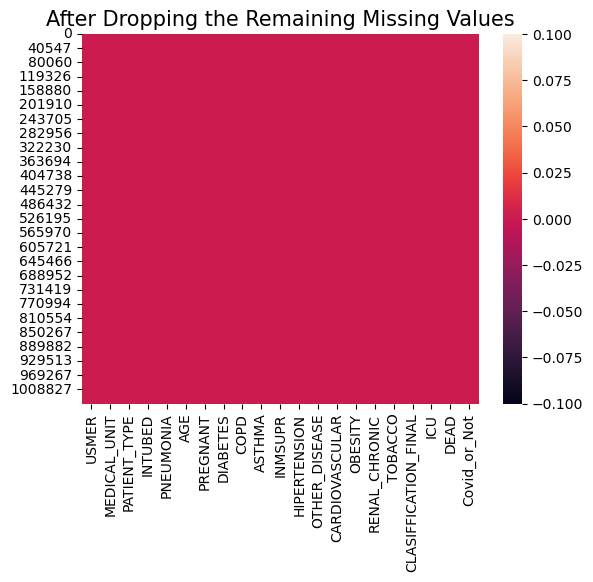

In [117]:
sns.heatmap(df_model.isnull())
plt.title('After Dropping the Remaining Missing Values', color = 'black', fontsize = 15)
plt.show()

In [118]:
df_model.Covid_or_Not.value_counts()

Not a Covid 19 Carrier    633448
A Covid 19 Carrier        386025
Name: Covid_or_Not, dtype: int64

In [119]:
df_model.Covid_or_Not = df_model.Covid_or_Not.apply(lambda x: 2 if x=="Not a Covid 19 Carrier" else 1)

### Removing unnecessary features

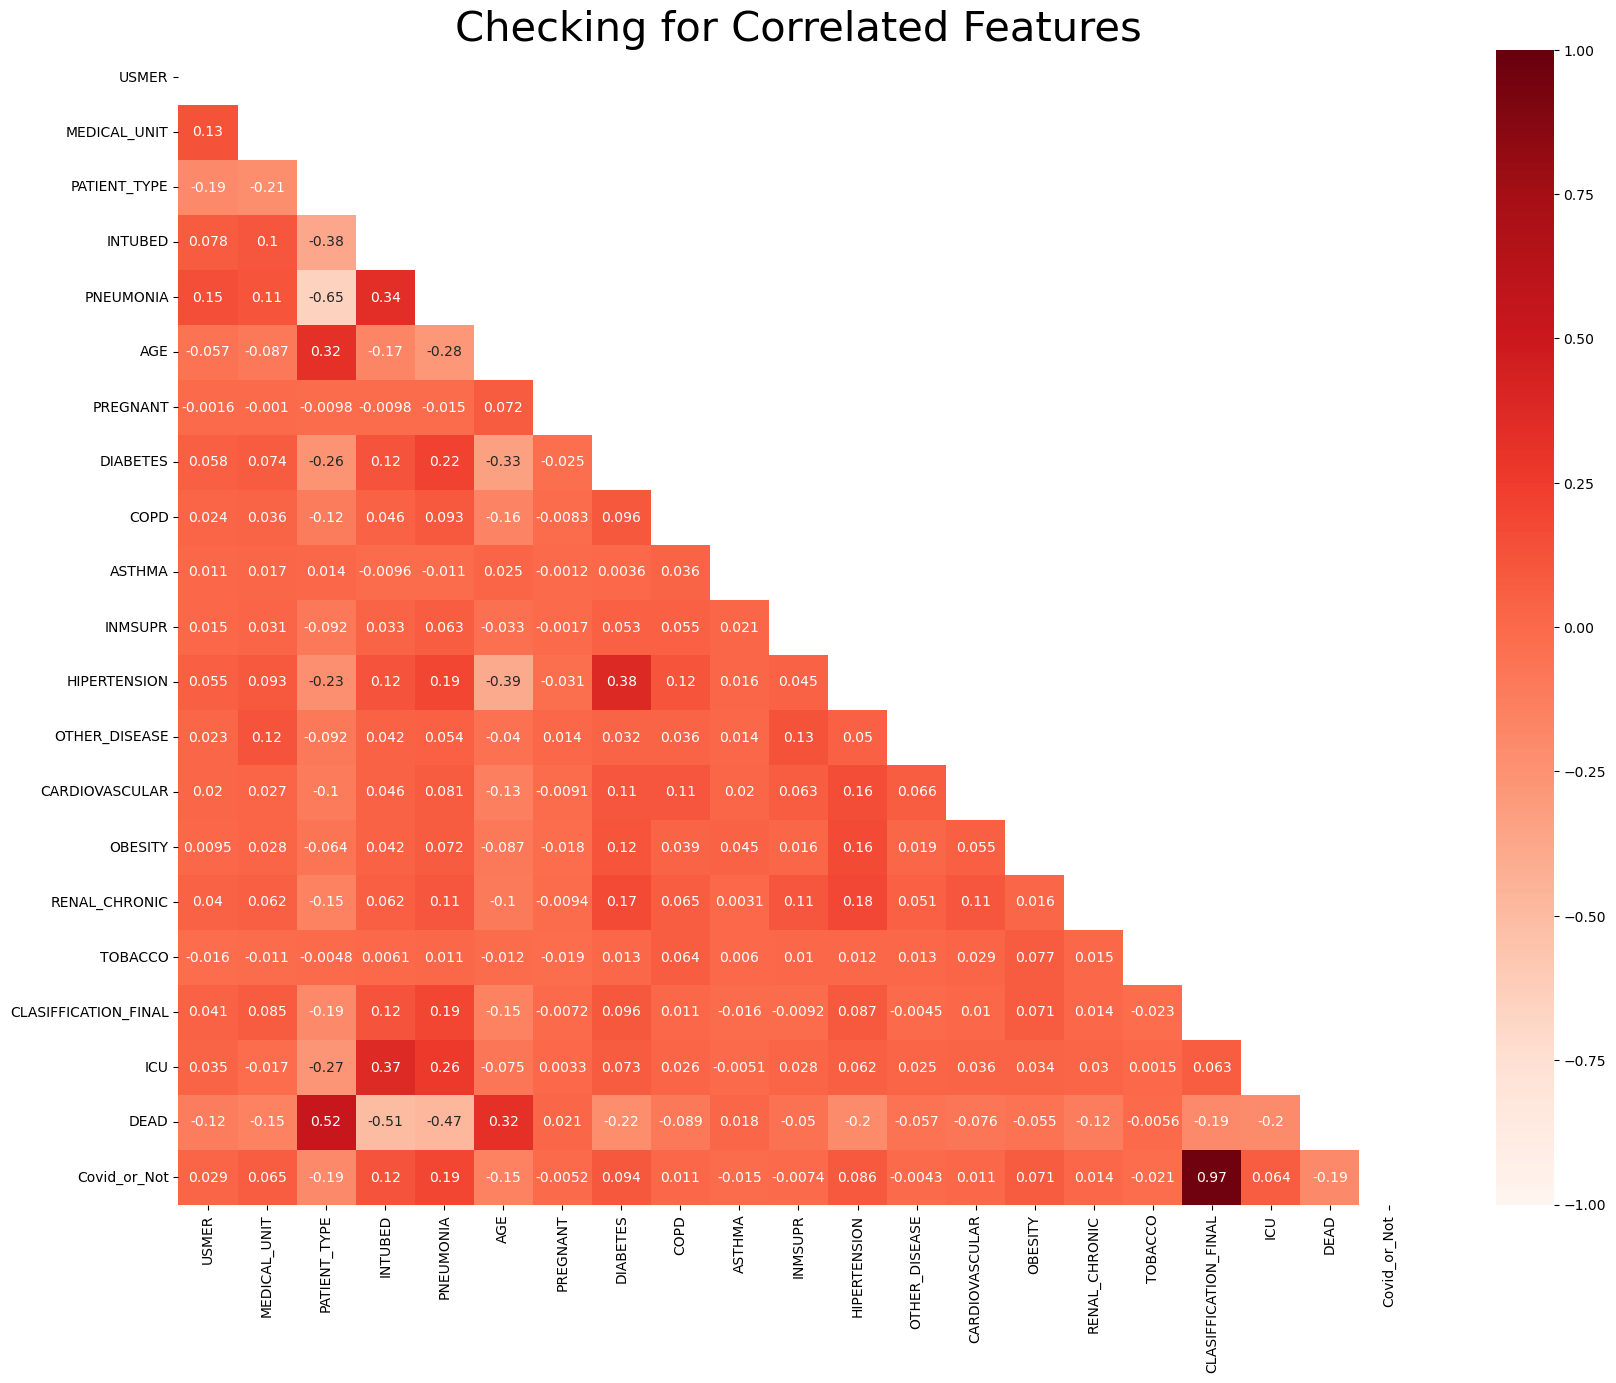

In [120]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df_model.corr()))
sns.heatmap(df_model.corr(), annot = True, cmap = "Reds", vmin = -1, vmax = 1, mask = mask)
plt.title('Checking for Correlated Features', color = 'black', fontsize = 30)
plt.show()

In [122]:
unrelevant_features = ["PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]
df_model.drop(columns=unrelevant_features,inplace=True)

### Data Splitting:

In [123]:
X = df_model.drop('DEAD' , axis= 1)
Y = df_model['DEAD']

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

### Checking for Correlated Features:

In [123]:
x_train.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Covid_or_Not
304766,2,4,1,2.0,2.0,10.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2
64146,2,4,1,2.0,2.0,57.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3,2.0,1
1048272,1,13,2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2
43133,1,4,2,1.0,1.0,71.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1
257909,2,4,1,2.0,2.0,19.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267639,2,4,1,2.0,2.0,33.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2
377469,2,6,1,2.0,2.0,32.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,7,2.0,2
133647,2,4,1,2.0,2.0,45.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
693640,2,12,1,2.0,2.0,43.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,6,2.0,2


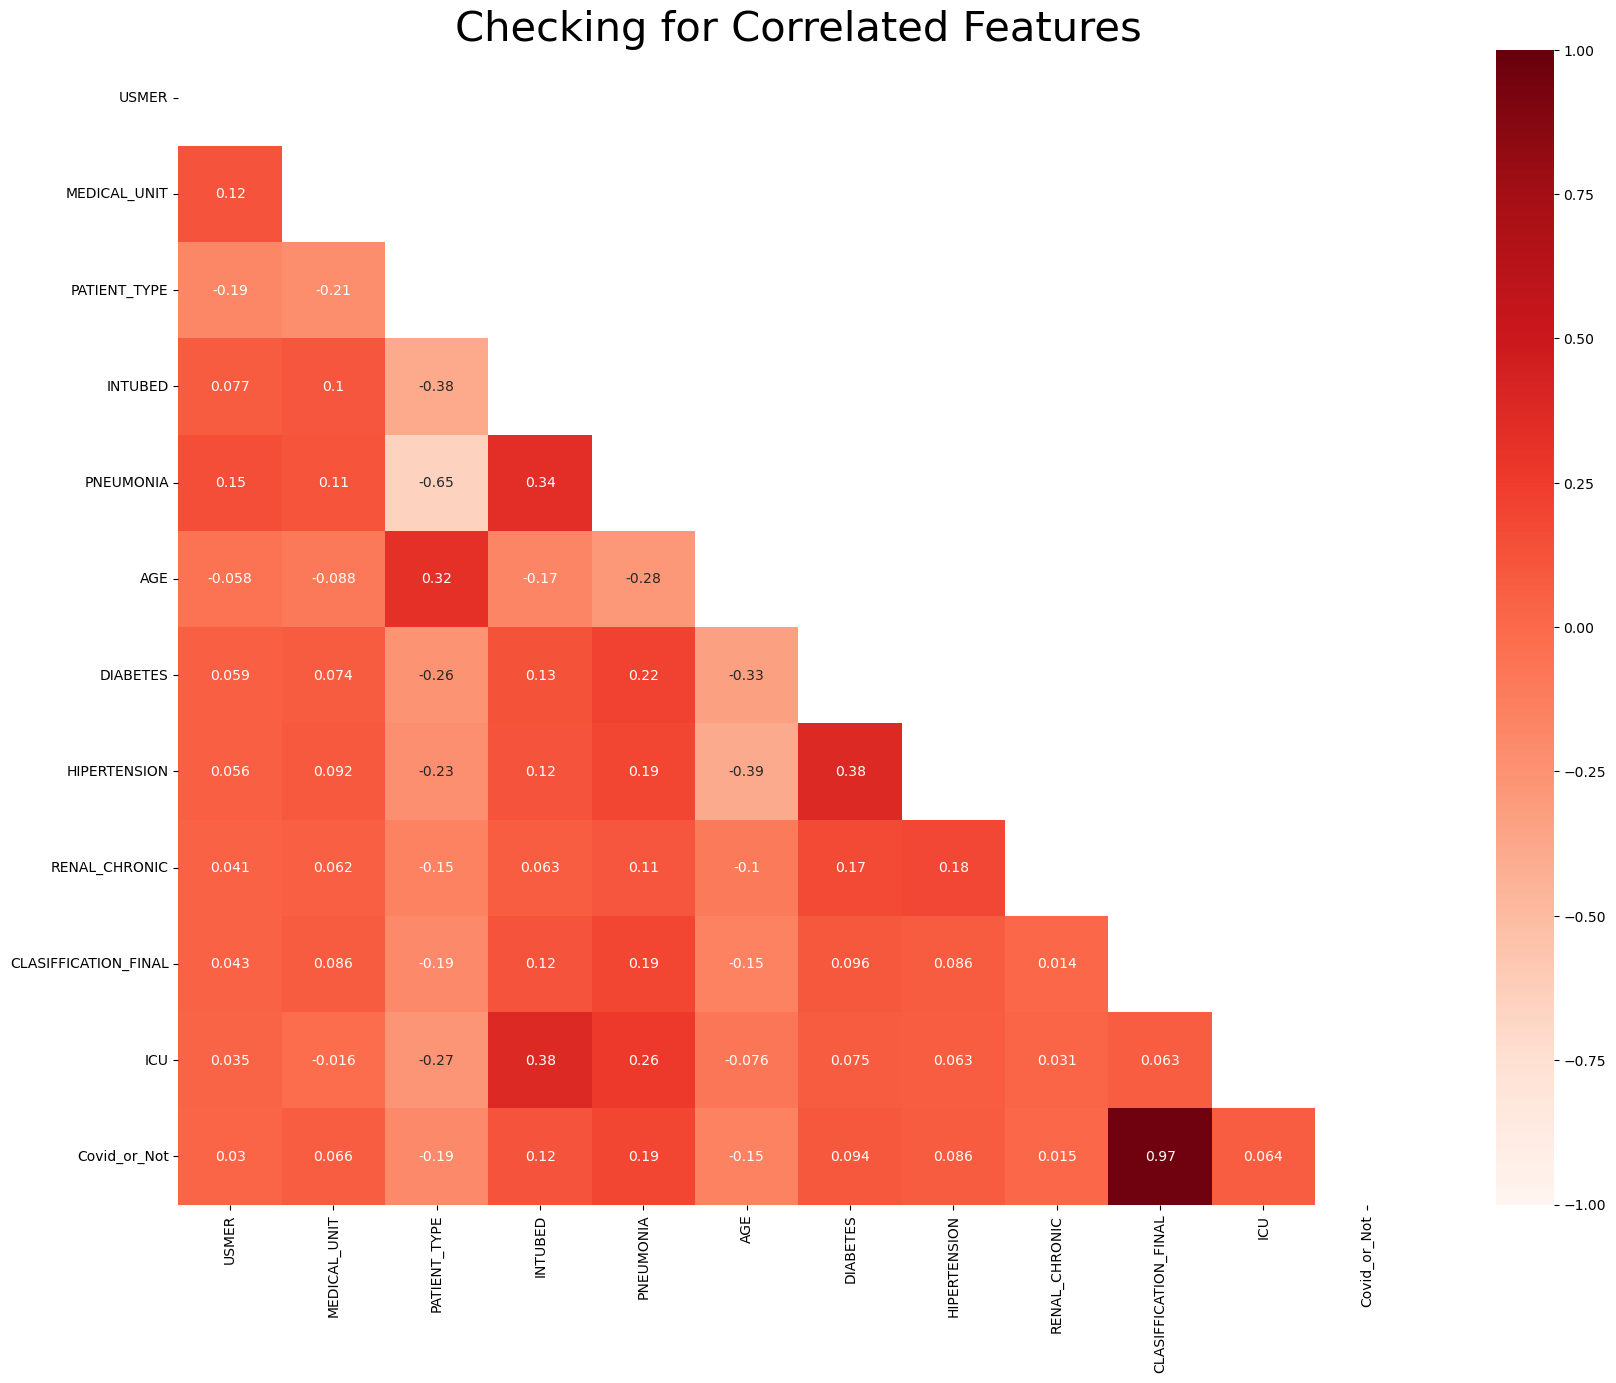

In [125]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(x_train.corr()))
sns.heatmap(x_train.corr(), annot = True, cmap = "Reds", vmin = -1, vmax = 1, mask = mask)
plt.title('Checking for Correlated Features', color = 'black', fontsize = 30)
plt.show()

In [126]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [127]:
print(correlation(x_train, 0.7))

{'Covid_or_Not'}


In [128]:
x_train.drop('Covid_or_Not',axis=1, inplace = True)
x_test.drop('Covid_or_Not',axis=1, inplace = True)

### Checking Data for Balance:

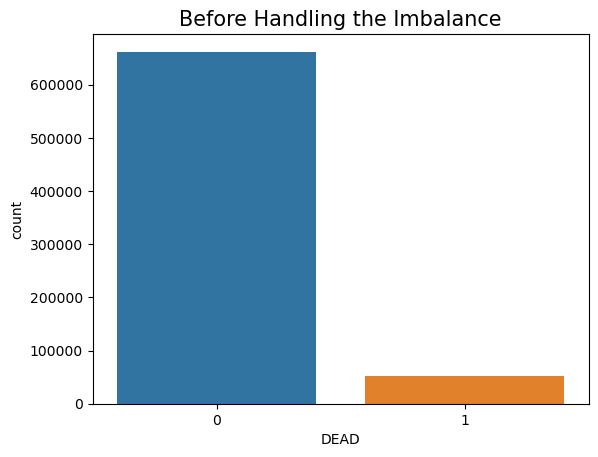

In [129]:
sns.countplot(x = y_train)
plt.title('Before Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

In [130]:
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

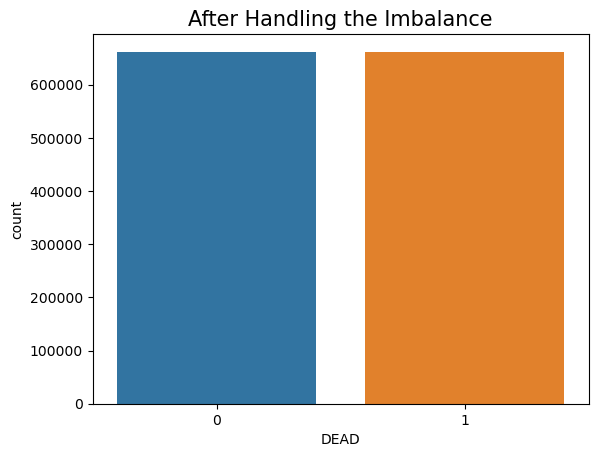

In [131]:
# Let's check our data again:
sns.countplot(x = y_train)
plt.title('After Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

## Important Note
#### We should always split into test and train sets BEFORE trying any resampling techniques! so that we can apply our techniques only on the train sets (**remember we should never miss with our test sets!!**).


#### Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets! (Data Leakage). This can allow our model to simply memorize specific data points and cause overfitting.

## Training and Testing

### Logistic Regression

In [132]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Logistic Regression Train Accuracy: ", lr.score(x_train,y_train), "\n")
print("Logistic Regression Test Accuracy: ", lr.score(x_test,y_test))

Logistic Regression Train Accuracy:  0.9056771757598641 

Logistic Regression Test Accuracy:  0.8994676990079845


In [133]:
Classes = ['Not Dead', 'Dead']
print("Logistic Regression Classification Report:", "\n", classification_report(y_test, lr.predict(x_test), target_names = Classes))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.90      0.94    284090
        Dead       0.41      0.91      0.56     21752

    accuracy                           0.90    305842
   macro avg       0.70      0.91      0.75    305842
weighted avg       0.95      0.90      0.92    305842



### Decision Tree

In [141]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
print("Decision Tree Train Accuracy: ", dt.score(x_train,y_train), "\n")
print("Decision Tree Test Accuracy: ", dt.score(x_test,y_test))

Decision Tree Train Accuracy:  0.9697942231451765 

Decision Tree Test Accuracy:  0.9237351312115406


In [142]:
print("Decision Tree Classification Report:", "\n",classification_report(y_test, dt.predict(x_test), target_names = Classes))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.97      0.94      0.96    284090
        Dead       0.47      0.66      0.55     21752

    accuracy                           0.92    305842
   macro avg       0.72      0.80      0.76    305842
weighted avg       0.94      0.92      0.93    305842



### Random Forest

In [143]:
rf=RandomForestClassifier(n_estimators=4,random_state=42)
rf.fit(x_train,y_train)
print("Random Forest Train Accuracy: ", rf.score(x_train,y_train), "\n")
print("Random Forest Forest Test Accuracy: ", rf.score(x_test,y_test))

Random Forest Train Accuracy:  0.9674140079290164 

Random Forest Forest Test Accuracy:  0.9257754003701257


In [144]:
print("Decision Tree Classification Report:", "\n",classification_report(y_test, dt.predict(x_test), target_names = Classes))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.97      0.94      0.96    284090
        Dead       0.47      0.66      0.55     21752

    accuracy                           0.92    305842
   macro avg       0.72      0.80      0.76    305842
weighted avg       0.94      0.92      0.93    305842



### Naive Bayes

In [145]:
gnb = GaussianNB()
gnb.fit(x_train , y_train)
print("Naive Bayes Train Accuracy: ", gnb.score(x_train,y_train), "\n")
print("Naive Bayes Test Accuracy: ", gnb.score(x_test,y_test))

Naive Bayes Train Accuracy:  0.8762529733811592 

Naive Bayes Test Accuracy:  0.8810758496217


In [146]:
print("Naive Bayes Classification Report:", "\n",classification_report(y_test, gnb.predict(x_test), target_names = Classes))

Naive Bayes Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.88      0.93    284090
        Dead       0.36      0.88      0.51     21752

    accuracy                           0.88    305842
   macro avg       0.68      0.88      0.72    305842
weighted avg       0.94      0.88      0.90    305842



### XGBoost

In [147]:
XGB = XGBClassifier()
XGB.fit(x_train , y_train)
print("XGBoost Train Accuracy: ", XGB.score(x_train,y_train), "\n")
print("XGBoost Test Accuracy: ", XGB.score(x_test,y_test))

XGBoost Train Accuracy:  0.9466384746082688 

XGBoost Test Accuracy:  0.9212698059782503


In [148]:
print("XGBoost Classification Report:", "\n",classification_report(y_test, XGB.predict(x_test), target_names = Classes))

XGBoost Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.93      0.96    284090
        Dead       0.47      0.83      0.60     21752

    accuracy                           0.92    305842
   macro avg       0.73      0.88      0.78    305842
weighted avg       0.95      0.92      0.93    305842



#### We' ve tried to train and test both the "Support Vector Machine" and the "K-Nearest Neighbors" algorithms, but they took like forever to run, and that can be expected due to the huge size of our data.

# Best Model?

#### From the above results we can see that althogh we got the highest accuracy (about 92%) from both **Decision Tree & Random Forrest** algorithms, but **the recall was very bad in the "Dead" class**, and since we care the most about our **"false negatives" --> (predicting a patient to be having no risks, while he/she is actually at high risk)** which results in type 2 error; **our judgement will be based on the recall** and here's where those algorithms fail with their misleading accuracy.

### So, from the point of view of both the accuracy and the recall togther, the best model was the **"Logistic Regression"** with about **90%** accuracy and lowest recall ("Not dead" class), and even a bit higher recall in the "Dead" class (about 91%).

<br>
<br>

### comes next the **"XGBoost"** with a great accuracy of **92%** but with a lowest recall of **83%** ("Dead" class).

### We can also notice that we sacrificed both the precision and f1 score which came pretty low in every report.

### Probably, we could've achieved better results if we undersampled our train dataset instead of oversampling it (as it will reduce the great noise in our data), but this could have resulted in losing a great portion of our data, and thus losing it's integrity.

-------------------------

# Conclusion

* Unfortunately 7.3% of the total patients have died, with about 70.5% of them were Covid Carriers.
<br>
<br>
* As for the total carriers they were about 37.5% out of the total patients.
<br>
<br>
* About 14% of those carriers have died.
<br>
<br>
* We found that age has a significant impact; as it increases chances of getting the virus increases.
<br>
<br>
* We also found that people who are suffering from obesity are more likely to carry the virus.
<br>
<br>
* As for pregnancy, we couldn't find any impact on Covid classification.
<br>
<br>
* We noticed that patients with "Pneumonia", "Hypertension", "Diabetes" and tobacco users have a great chance of getting the virus with "Pneumonia" patients being the most.
<br>
<br>
* We also noticed that there's a positive correlation between having "Hypertension" and "Diabetes" diseases; as most patients with one of those two diseases are subjected to get the other.
<br>
<br>
* We saw that among all the patients of these diseases the patients classified with 3rd degree of Covid are the highest by far.
<br>
<br>
* About 19% of the total patients were hospitalized, with a death percentage of 35%.
<br>
<br>
* The "Pneumonia" disease has the greatest impact on that percentage (35%).
<br>
<br>
* About 91% of the dead patients were hospitalized.
<br>
<br>
* About 9% out of the hospitalized patients were admitted to the ICU, with about 56% of them being classified as Covid carriers, and with a great percentage of death of about 49%.
<br>
<br>
* The death was very trending during mid 2020 starting from April up till August.
<br>
<br>
* As for our modeling, we got the highest accuracy of 92% using both "Random Forest" and "Decision Tree"
algorithms, but when checking the recall we found that those accuracies are misleading. So, we settled with the **"Logistic Regression"** that achieved great scores regarding both accuracy and recall with about **90%**.
